In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

# Read the data from a CSV file
data = pd.read_csv('./spotify-2023.csv')

# Display the first few rows of the dataframe
print("Initial Data:")
print(data.head())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Drop rows with missing values
cleaned_data = data.dropna()

# Display the first few rows of the cleaned dataframe
print("\nCleaned Data:")
print(cleaned_data.head())

# Summary statistics of the cleaned data
print("\nSummary Statistics:")
print(cleaned_data.describe())

Initial Data:
                            track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts    streams  in_apple_playlists  ...  bpm key   mode  \
0                147  141381703 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

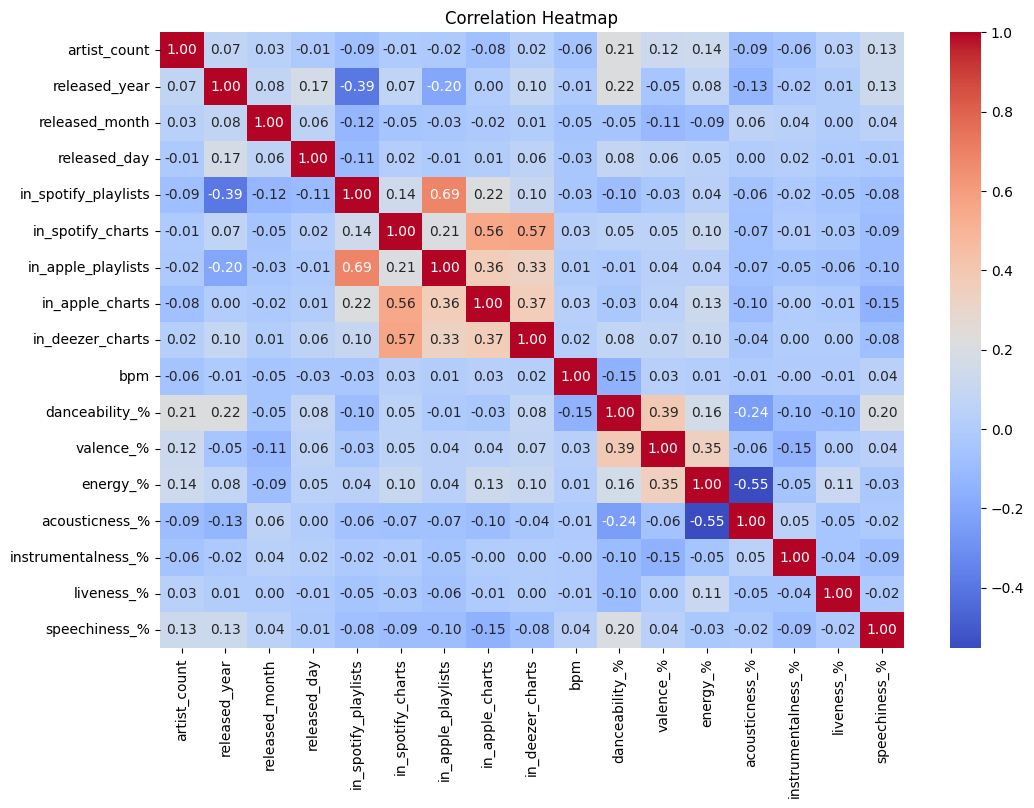

In [5]:
import seaborn as sns

import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = cleaned_data.corr(numeric_only=True)

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [6]:
(corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
                 .stack()
                 .sort_values(ascending=False).head(10))

in_spotify_playlists  in_apple_playlists    0.688316
in_spotify_charts     in_deezer_charts      0.566161
                      in_apple_charts       0.556804
danceability_%        valence_%             0.389729
in_apple_charts       in_deezer_charts      0.366581
in_apple_playlists    in_apple_charts       0.364761
valence_%             energy_%              0.349736
in_apple_playlists    in_deezer_charts      0.326815
in_spotify_playlists  in_apple_charts       0.215676
released_year         danceability_%        0.215032
dtype: float64

In [7]:
(corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
                 .stack()
                 .sort_values(ascending=False).tail(10))

released_month   valence_%              -0.110355
                 in_spotify_playlists   -0.122407
released_year    acousticness_%         -0.133224
in_apple_charts  speechiness_%          -0.146472
valence_%        instrumentalness_%     -0.147032
bpm              danceability_%         -0.148174
released_year    in_apple_playlists     -0.201474
danceability_%   acousticness_%         -0.240454
released_year    in_spotify_playlists   -0.390729
energy_%         acousticness_%         -0.552637
dtype: float64

In [11]:
# Compute the correlation matrix
corr_matrix = data.corr(numeric_only=True)

# Extract the upper triangle of the correlation matrix
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Unstack the matrix to convert it into a series and drop NaN values
sorted_pairs = upper_triangle.unstack().dropna().sort_values(ascending=False).head(20)
inv_sorted_pairs = upper_triangle.unstack().dropna().sort_values(ascending=False).tail(20)[::-1]

# Adjust display options to avoid truncation
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Display the sorted pairs
print(sorted_pairs)

in_apple_playlists  in_spotify_playlists    0.708277
in_deezer_charts    in_spotify_charts       0.600205
in_apple_charts     in_spotify_charts       0.552232
                    in_apple_playlists      0.414523
valence_%           danceability_%          0.408451
in_deezer_charts    in_apple_charts         0.383668
                    in_apple_playlists      0.369032
energy_%            valence_%               0.357612
in_apple_charts     in_spotify_playlists    0.271317
in_apple_playlists  in_spotify_charts       0.233354
danceability_%      artist_count            0.207027
energy_%            danceability_%          0.198095
danceability_%      released_year           0.187333
speechiness_%       danceability_%          0.184977
released_day        released_year           0.174282
in_spotify_charts   in_spotify_playlists    0.164331
in_deezer_charts    in_spotify_playlists    0.144342
energy_%            artist_count            0.137096
speechiness_%       released_year           0.

In [14]:
to_analyze = []
to_analyze.extend(sorted_pairs.index)
to_analyze.extend(inv_sorted_pairs.index)

to_analyze

[('in_apple_playlists', 'in_spotify_playlists'),
 ('in_deezer_charts', 'in_spotify_charts'),
 ('in_apple_charts', 'in_spotify_charts'),
 ('in_apple_charts', 'in_apple_playlists'),
 ('valence_%', 'danceability_%'),
 ('in_deezer_charts', 'in_apple_charts'),
 ('in_deezer_charts', 'in_apple_playlists'),
 ('energy_%', 'valence_%'),
 ('in_apple_charts', 'in_spotify_playlists'),
 ('in_apple_playlists', 'in_spotify_charts'),
 ('danceability_%', 'artist_count'),
 ('energy_%', 'danceability_%'),
 ('danceability_%', 'released_year'),
 ('speechiness_%', 'danceability_%'),
 ('released_day', 'released_year'),
 ('in_spotify_charts', 'in_spotify_playlists'),
 ('in_deezer_charts', 'in_spotify_playlists'),
 ('energy_%', 'artist_count'),
 ('speechiness_%', 'released_year'),
 ('valence_%', 'artist_count'),
 ('acousticness_%', 'energy_%'),
 ('in_spotify_playlists', 'released_year'),
 ('acousticness_%', 'danceability_%'),
 ('in_apple_playlists', 'released_year'),
 ('speechiness_%', 'in_apple_charts'),
 ('da

Regression analysis for in_apple_playlists and in_spotify_playlists:
                             OLS Regression Results                             
Dep. Variable:     in_spotify_playlists   R-squared:                       0.474
Model:                              OLS   Adj. R-squared:                  0.473
Method:                   Least Squares   F-statistic:                     733.8
Date:                  Sun, 08 Dec 2024   Prob (F-statistic):          9.63e-116
Time:                          19:47:57   Log-Likelihood:                -8212.2
No. Observations:                   817   AIC:                         1.643e+04
Df Residuals:                       815   BIC:                         1.644e+04
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

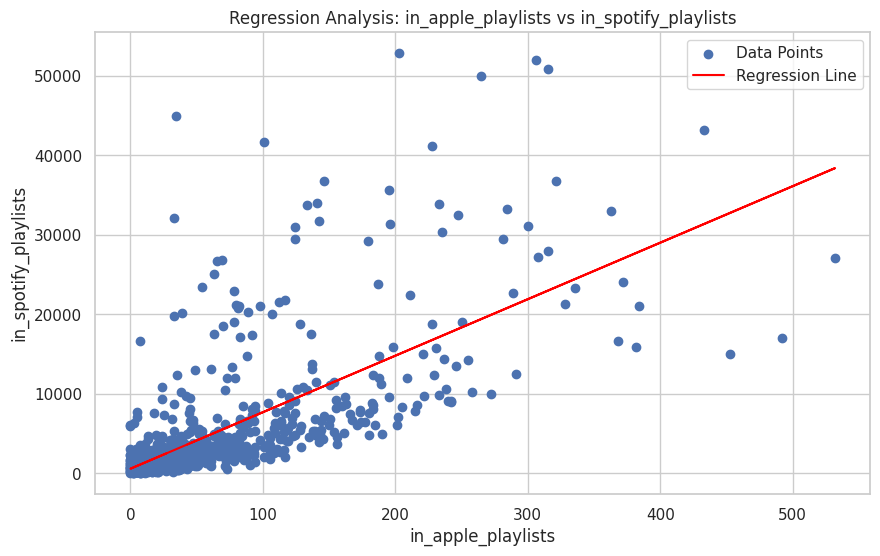

Regression analysis for in_deezer_charts and in_spotify_charts:
                            OLS Regression Results                            
Dep. Variable:      in_spotify_charts   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.320
Method:                 Least Squares   F-statistic:                     384.5
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           1.99e-70
Time:                        19:47:57   Log-Likelihood:                -3389.9
No. Observations:                 817   AIC:                             6784.
Df Residuals:                     815   BIC:                             6793.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

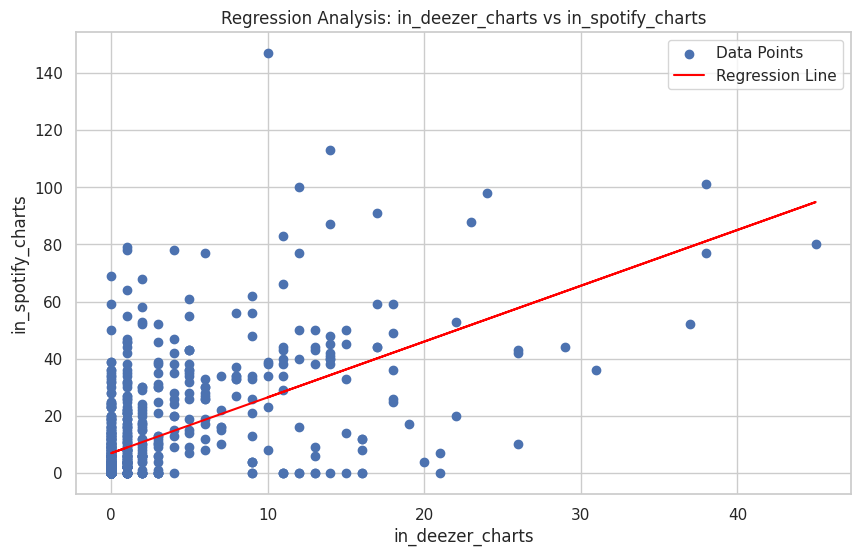

Regression analysis for in_apple_charts and in_spotify_charts:
                            OLS Regression Results                            
Dep. Variable:      in_spotify_charts   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     366.2
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           1.05e-67
Time:                        19:47:58   Log-Likelihood:                -3396.2
No. Observations:                 817   AIC:                             6796.
Df Residuals:                     815   BIC:                             6806.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

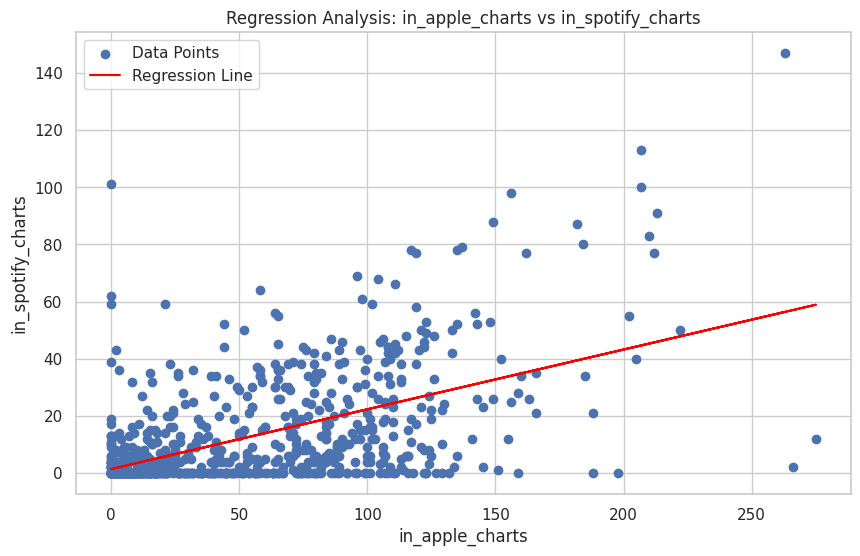

Regression analysis for in_apple_charts and in_apple_playlists:
                            OLS Regression Results                            
Dep. Variable:     in_apple_playlists   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     125.1
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           4.11e-27
Time:                        19:47:58   Log-Likelihood:                -4627.0
No. Observations:                 817   AIC:                             9258.
Df Residuals:                     815   BIC:                             9267.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

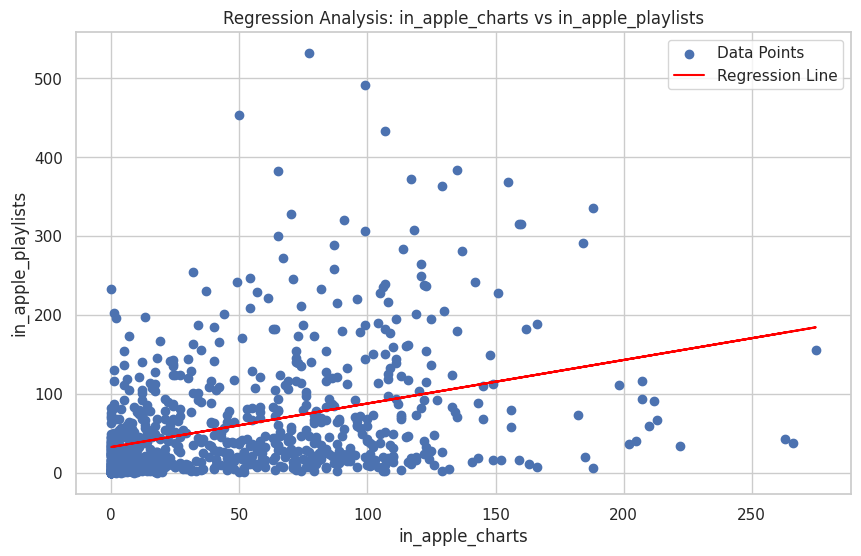

Regression analysis for valence_% and danceability_%:
                            OLS Regression Results                            
Dep. Variable:         danceability_%   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     146.0
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           4.98e-31
Time:                        19:47:59   Log-Likelihood:                -3286.8
No. Observations:                 817   AIC:                             6578.
Df Residuals:                     815   BIC:                             6587.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

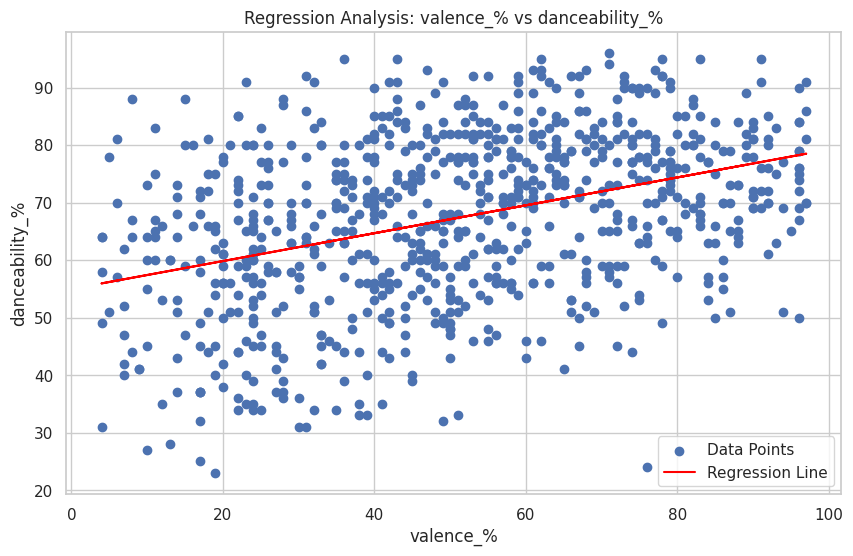

Regression analysis for in_deezer_charts and in_apple_charts:
                            OLS Regression Results                            
Dep. Variable:        in_apple_charts   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     126.5
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           2.18e-27
Time:                        19:47:59   Log-Likelihood:                -4288.9
No. Observations:                 817   AIC:                             8582.
Df Residuals:                     815   BIC:                             8591.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

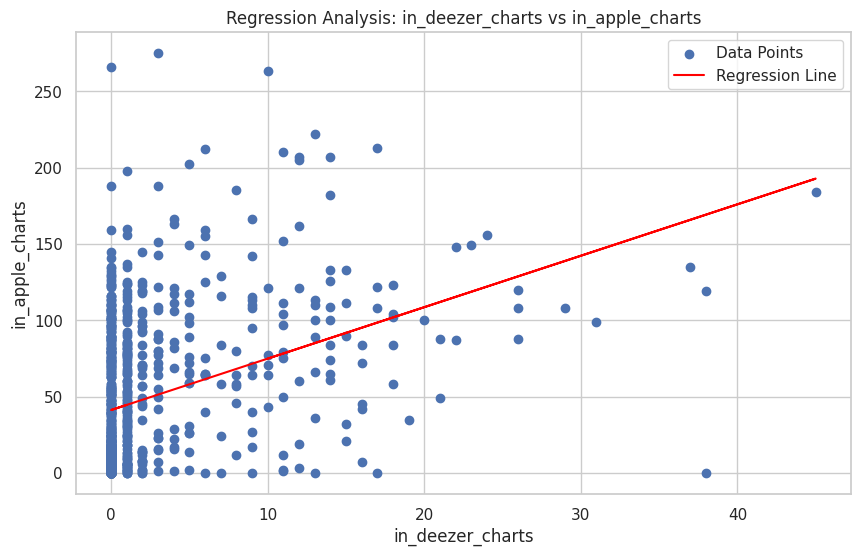

Regression analysis for in_deezer_charts and in_apple_playlists:
                            OLS Regression Results                            
Dep. Variable:     in_apple_playlists   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     97.46
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           8.66e-22
Time:                        19:48:00   Log-Likelihood:                -4639.2
No. Observations:                 817   AIC:                             9282.
Df Residuals:                     815   BIC:                             9292.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

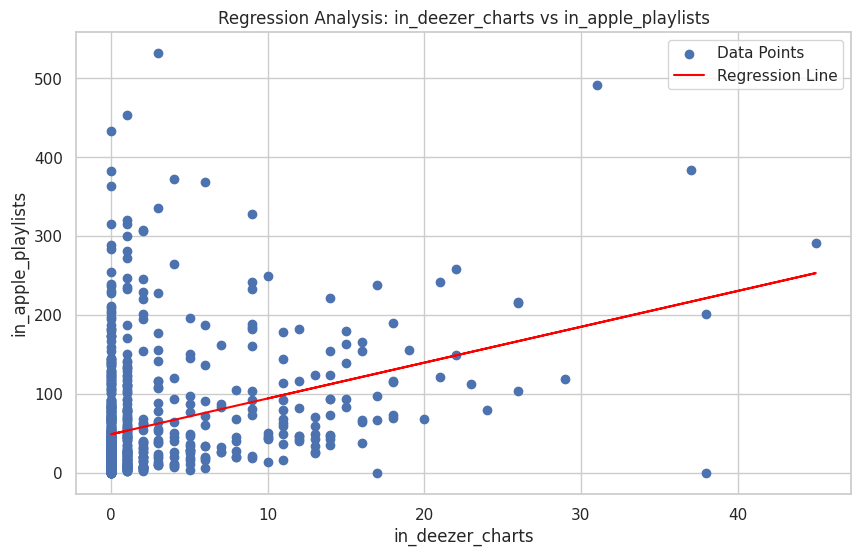

Regression analysis for energy_% and valence_%:
                            OLS Regression Results                            
Dep. Variable:              valence_%   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     113.6
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           6.45e-25
Time:                        19:48:00   Log-Likelihood:                -3688.9
No. Observations:                 817   AIC:                             7382.
Df Residuals:                     815   BIC:                             7391.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
cons

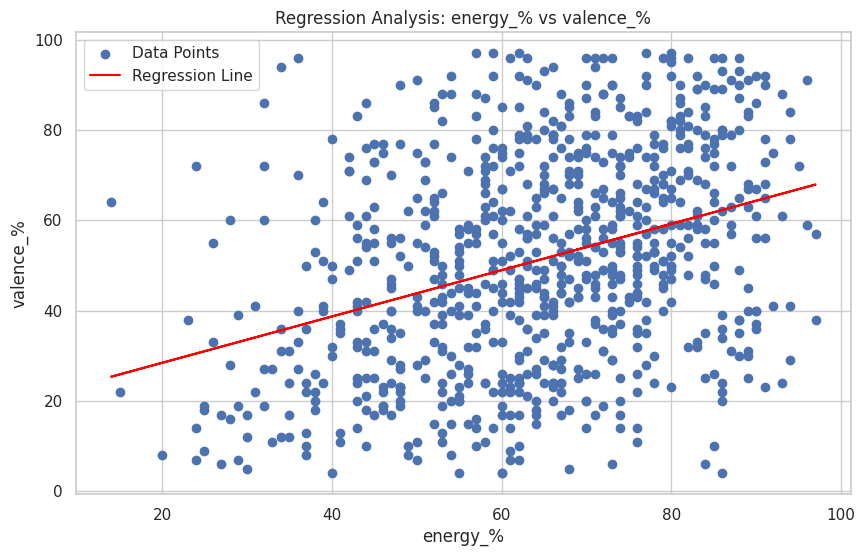

Regression analysis for in_apple_charts and in_spotify_playlists:
                             OLS Regression Results                             
Dep. Variable:     in_spotify_playlists   R-squared:                       0.047
Model:                              OLS   Adj. R-squared:                  0.045
Method:                   Least Squares   F-statistic:                     39.76
Date:                  Sun, 08 Dec 2024   Prob (F-statistic):           4.70e-10
Time:                          19:48:00   Log-Likelihood:                -8455.0
No. Observations:                   817   AIC:                         1.691e+04
Df Residuals:                       815   BIC:                         1.692e+04
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

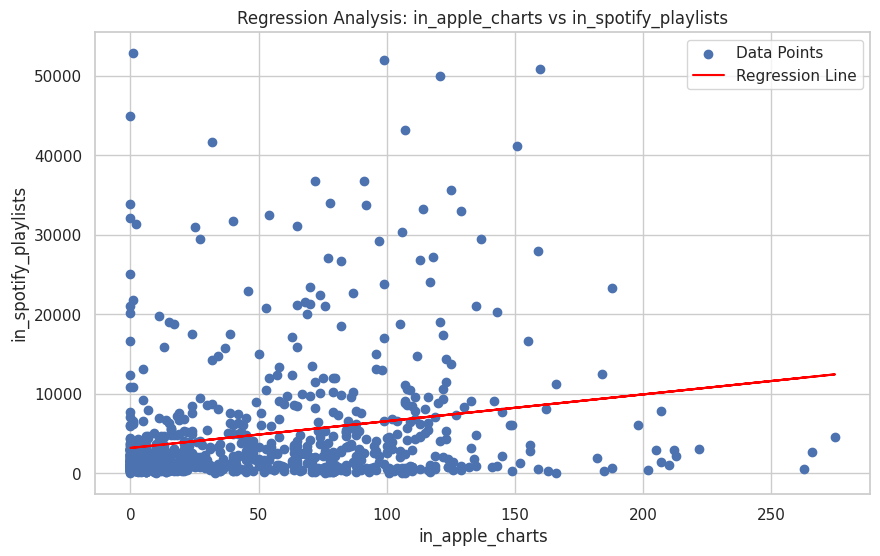

Regression analysis for in_apple_playlists and in_spotify_charts:
                            OLS Regression Results                            
Dep. Variable:      in_spotify_charts   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     36.93
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           1.88e-09
Time:                        19:48:01   Log-Likelihood:                -3529.7
No. Observations:                 817   AIC:                             7063.
Df Residuals:                     815   BIC:                             7073.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

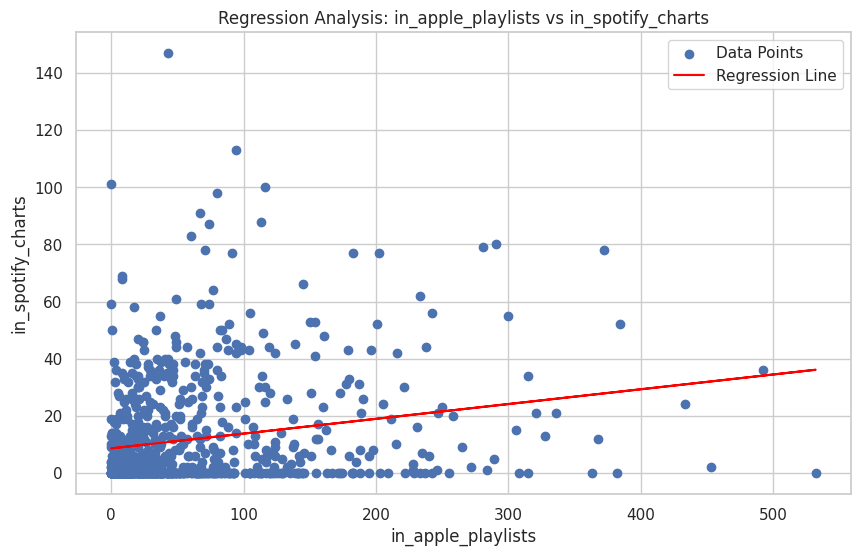

Regression analysis for danceability_% and artist_count:
                            OLS Regression Results                            
Dep. Variable:           artist_count   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     39.14
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           6.35e-10
Time:                        19:48:01   Log-Likelihood:                -1031.6
No. Observations:                 817   AIC:                             2067.
Df Residuals:                     815   BIC:                             2077.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

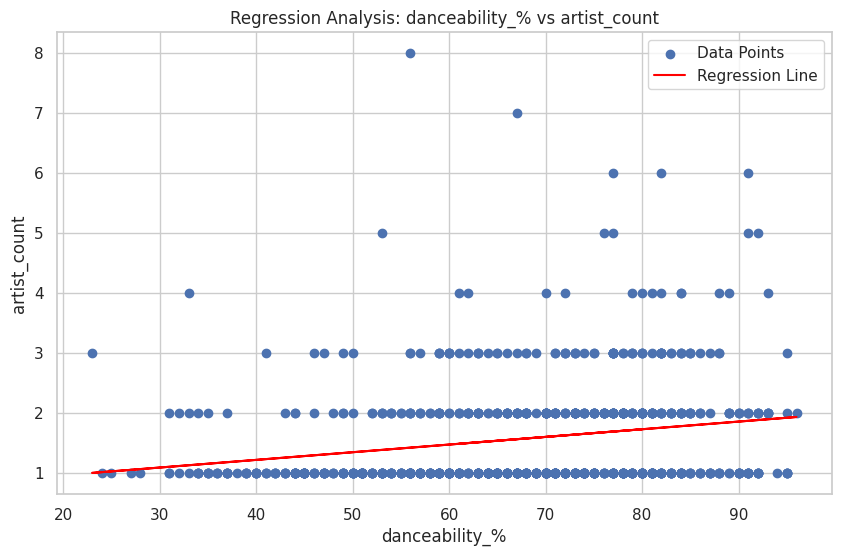

Regression analysis for energy_% and danceability_%:
                            OLS Regression Results                            
Dep. Variable:         danceability_%   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     20.86
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           5.71e-06
Time:                        19:48:01   Log-Likelihood:                -3343.8
No. Observations:                 817   AIC:                             6692.
Df Residuals:                     815   BIC:                             6701.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

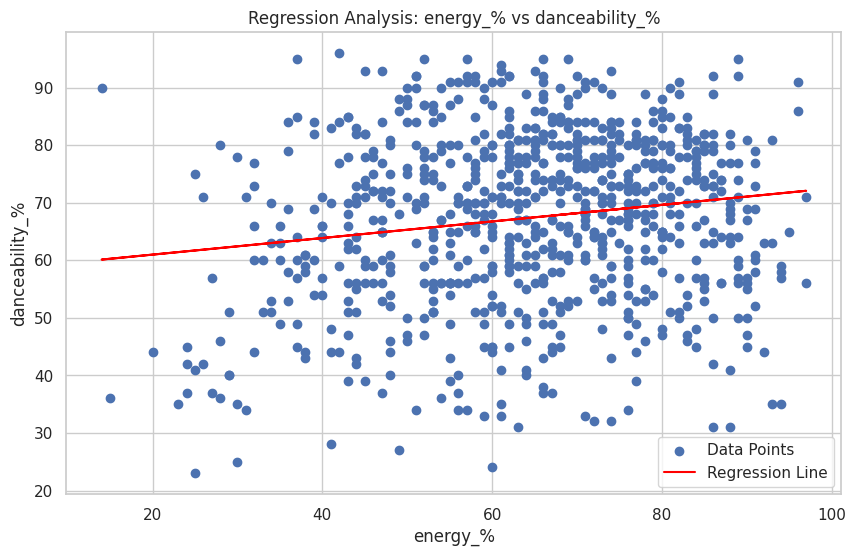

Regression analysis for danceability_% and released_year:
                            OLS Regression Results                            
Dep. Variable:          released_year   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     39.51
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           5.31e-10
Time:                        19:48:02   Log-Likelihood:                -3085.7
No. Observations:                 817   AIC:                             6175.
Df Residuals:                     815   BIC:                             6185.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

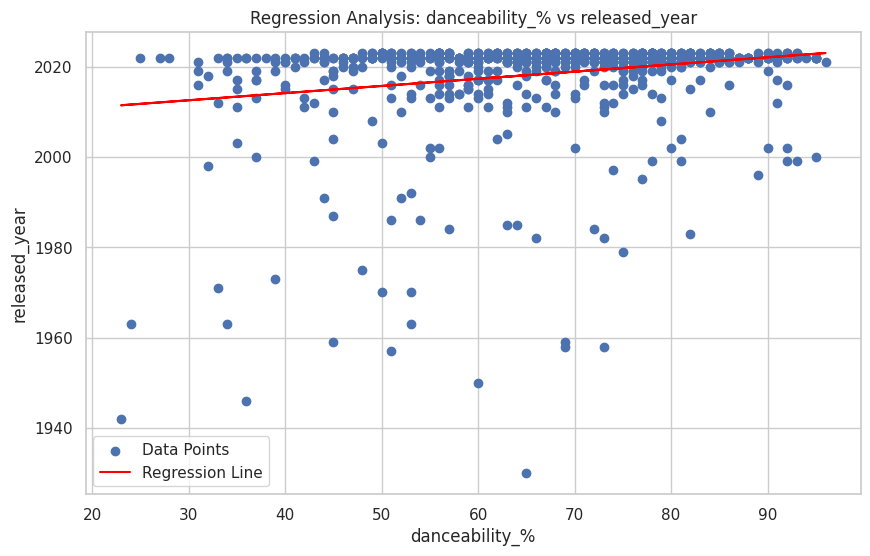

Regression analysis for speechiness_% and danceability_%:
                            OLS Regression Results                            
Dep. Variable:         danceability_%   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     34.38
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           6.58e-09
Time:                        19:48:02   Log-Likelihood:                -3337.2
No. Observations:                 817   AIC:                             6678.
Df Residuals:                     815   BIC:                             6688.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

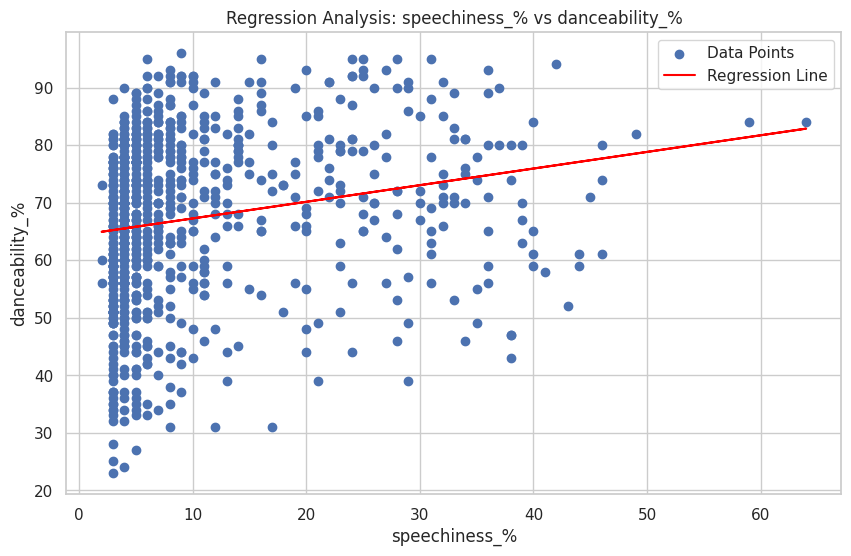

Regression analysis for released_day and released_year:
                            OLS Regression Results                            
Dep. Variable:          released_year   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     23.20
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           1.74e-06
Time:                        19:48:02   Log-Likelihood:                -3093.6
No. Observations:                 817   AIC:                             6191.
Df Residuals:                     815   BIC:                             6201.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

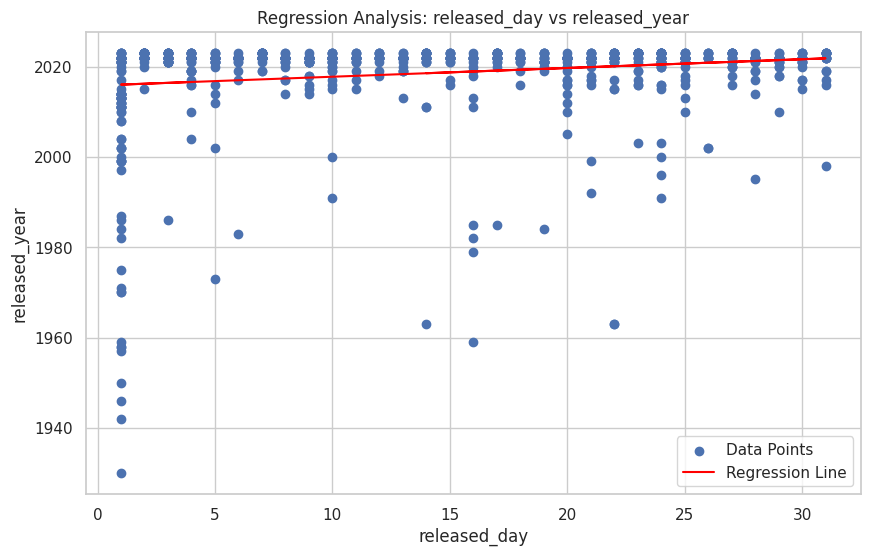

Regression analysis for in_spotify_charts and in_spotify_playlists:
                             OLS Regression Results                             
Dep. Variable:     in_spotify_playlists   R-squared:                       0.020
Model:                              OLS   Adj. R-squared:                  0.019
Method:                   Least Squares   F-statistic:                     16.61
Date:                  Sun, 08 Dec 2024   Prob (F-statistic):           5.03e-05
Time:                          19:48:03   Log-Likelihood:                -8466.2
No. Observations:                   817   AIC:                         1.694e+04
Df Residuals:                       815   BIC:                         1.695e+04
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

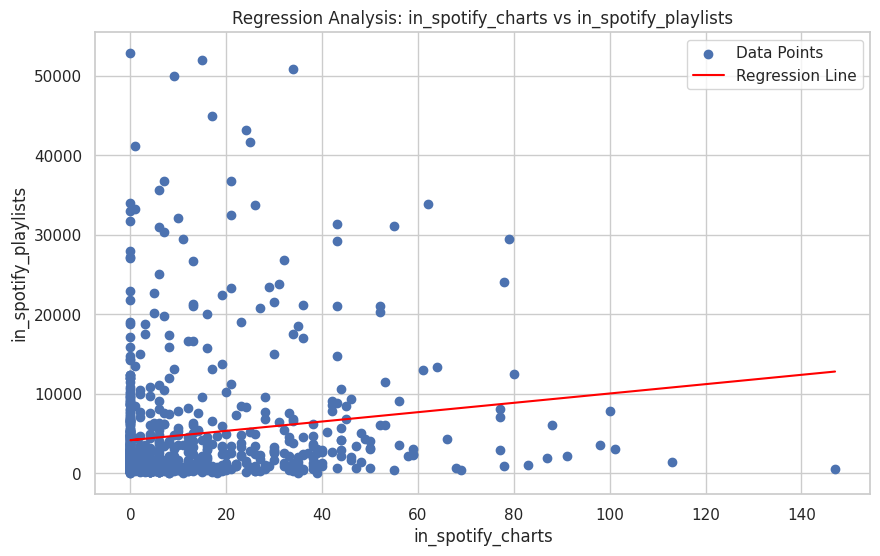

Regression analysis for in_deezer_charts and in_spotify_playlists:
                             OLS Regression Results                             
Dep. Variable:     in_spotify_playlists   R-squared:                       0.010
Model:                              OLS   Adj. R-squared:                  0.009
Method:                   Least Squares   F-statistic:                     8.447
Date:                  Sun, 08 Dec 2024   Prob (F-statistic):            0.00376
Time:                          19:48:03   Log-Likelihood:                -8470.2
No. Observations:                   817   AIC:                         1.694e+04
Df Residuals:                       815   BIC:                         1.695e+04
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

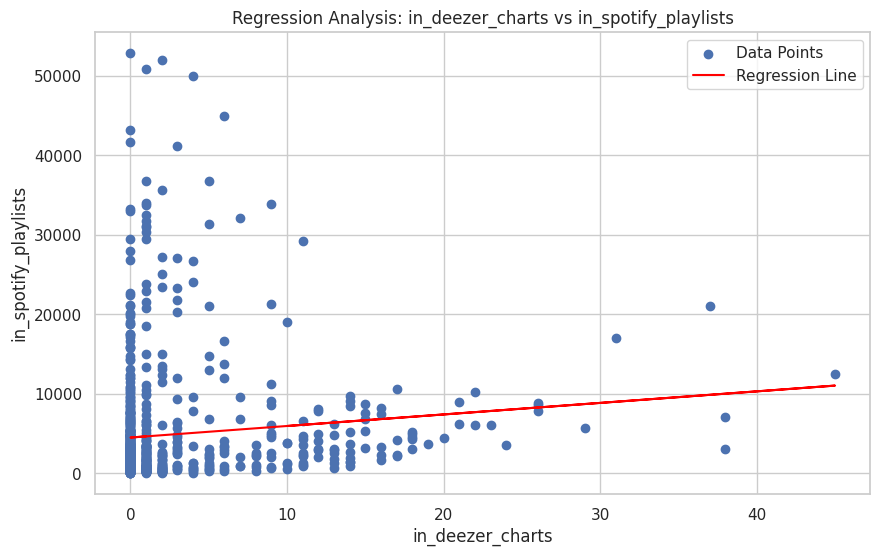

Regression analysis for energy_% and artist_count:
                            OLS Regression Results                            
Dep. Variable:           artist_count   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     15.71
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           8.02e-05
Time:                        19:48:03   Log-Likelihood:                -1043.0
No. Observations:                 817   AIC:                             2090.
Df Residuals:                     815   BIC:                             2099.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c

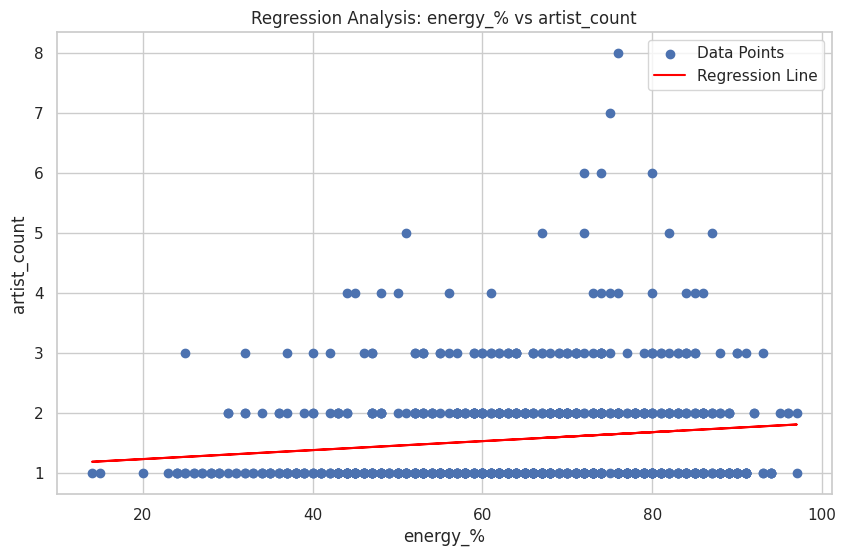

Regression analysis for speechiness_% and released_year:
                            OLS Regression Results                            
Dep. Variable:          released_year   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     13.99
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           0.000197
Time:                        19:48:04   Log-Likelihood:                -3098.1
No. Observations:                 817   AIC:                             6200.
Df Residuals:                     815   BIC:                             6210.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

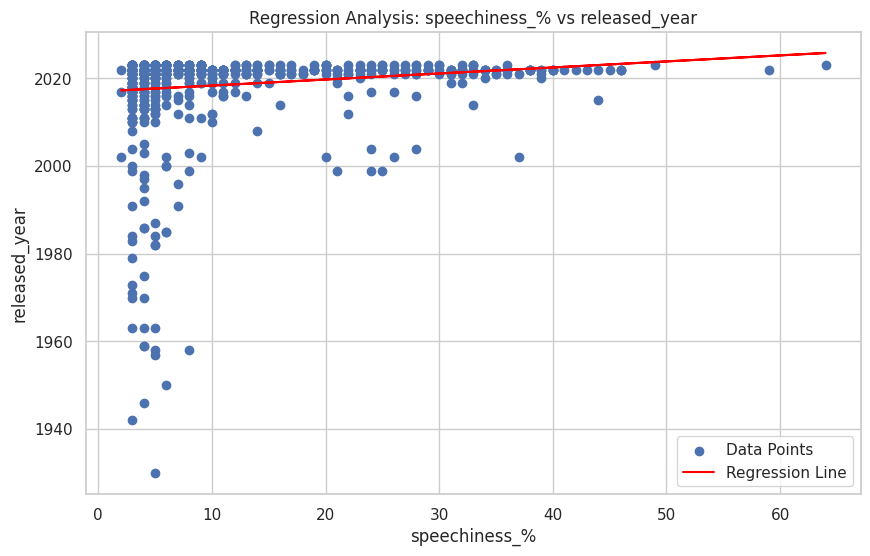

Regression analysis for valence_% and artist_count:
                            OLS Regression Results                            
Dep. Variable:           artist_count   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     12.65
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           0.000396
Time:                        19:48:04   Log-Likelihood:                -1044.5
No. Observations:                 817   AIC:                             2093.
Df Residuals:                     815   BIC:                             2102.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


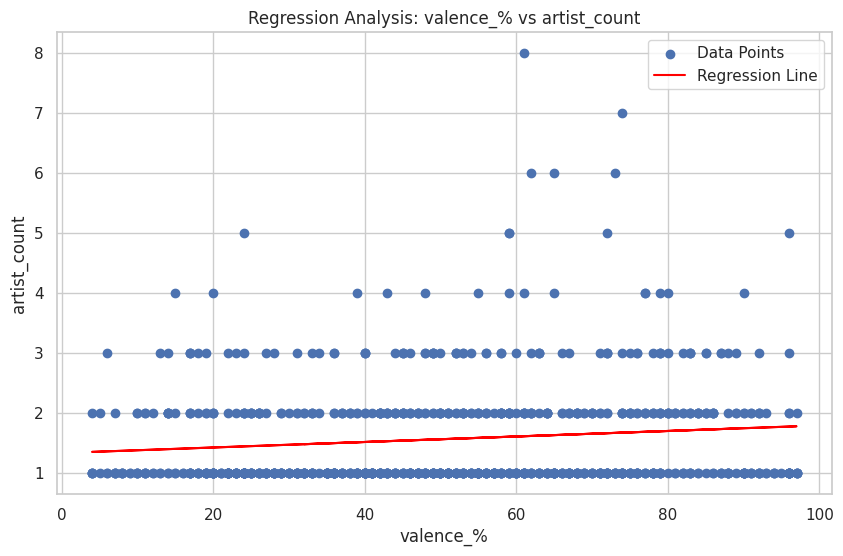

Regression analysis for acousticness_% and energy_%:
                            OLS Regression Results                            
Dep. Variable:               energy_%   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     358.4
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           1.61e-66
Time:                        19:48:05   Log-Likelihood:                -3280.6
No. Observations:                 817   AIC:                             6565.
Df Residuals:                     815   BIC:                             6575.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

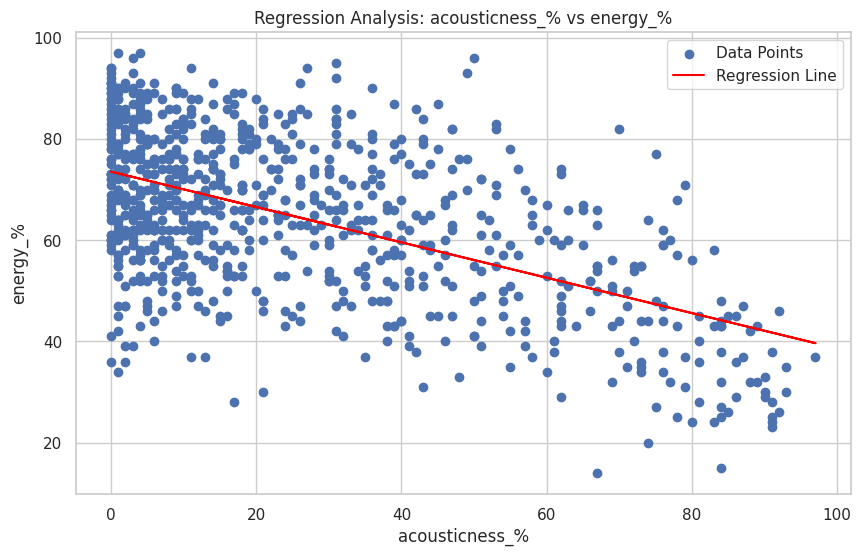

Regression analysis for in_spotify_playlists and released_year:
                            OLS Regression Results                            
Dep. Variable:          released_year   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     146.8
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           3.41e-31
Time:                        19:48:05   Log-Likelihood:                -3037.4
No. Observations:                 817   AIC:                             6079.
Df Residuals:                     815   BIC:                             6088.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

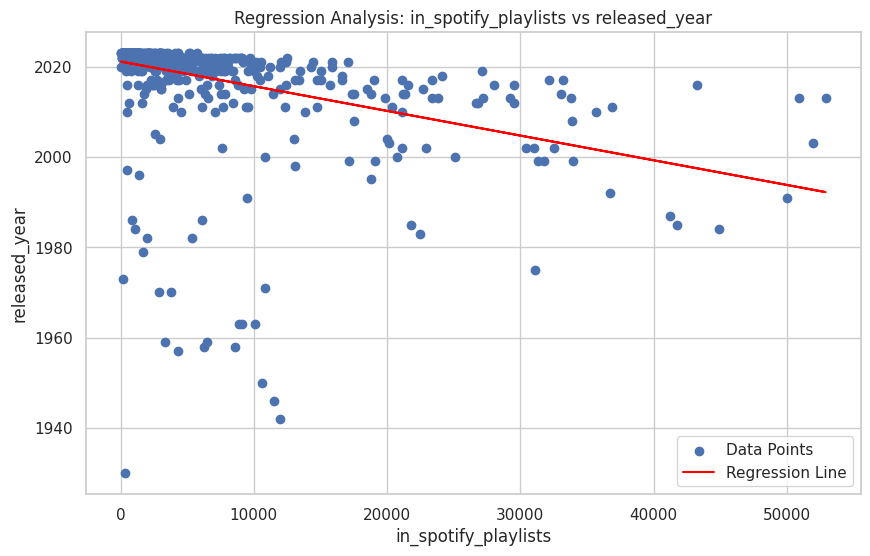

Regression analysis for acousticness_% and danceability_%:
                            OLS Regression Results                            
Dep. Variable:         danceability_%   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     50.01
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           3.29e-12
Time:                        19:48:06   Log-Likelihood:                -3329.8
No. Observations:                 817   AIC:                             6664.
Df Residuals:                     815   BIC:                             6673.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

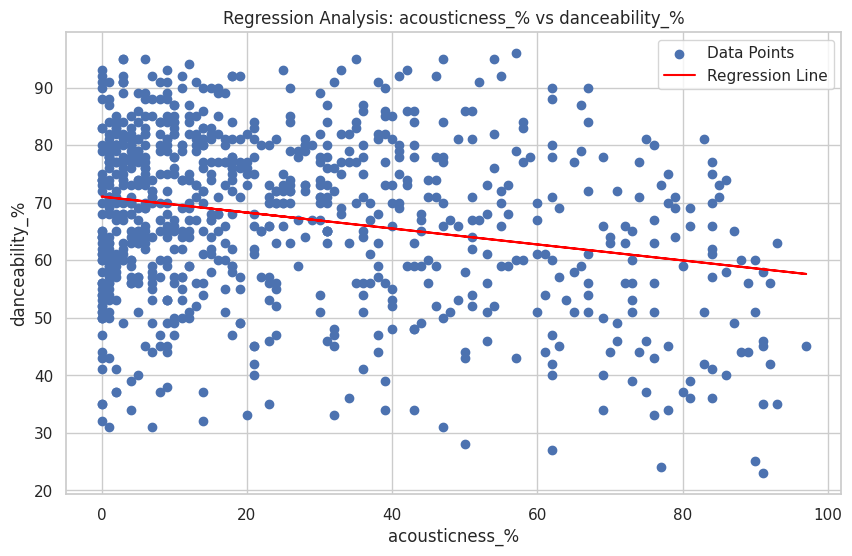

Regression analysis for in_apple_playlists and released_year:
                            OLS Regression Results                            
Dep. Variable:          released_year   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     34.48
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           6.26e-09
Time:                        19:48:06   Log-Likelihood:                -3088.1
No. Observations:                 817   AIC:                             6180.
Df Residuals:                     815   BIC:                             6190.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

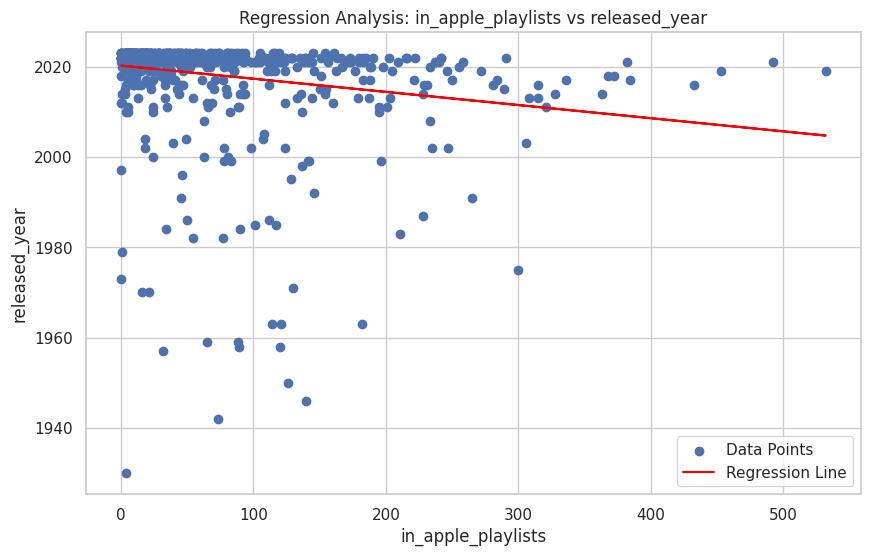

Regression analysis for speechiness_% and in_apple_charts:
                            OLS Regression Results                            
Dep. Variable:        in_apple_charts   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     17.87
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           2.63e-05
Time:                        19:48:06   Log-Likelihood:                -4339.0
No. Observations:                 817   AIC:                             8682.
Df Residuals:                     815   BIC:                             8691.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

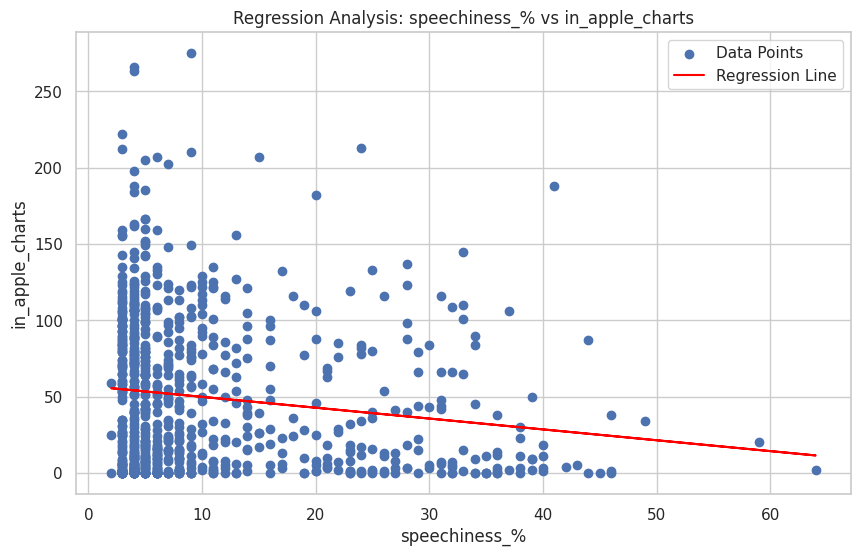

Regression analysis for danceability_% and bpm:
                            OLS Regression Results                            
Dep. Variable:                    bpm   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     18.30
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           2.12e-05
Time:                        19:48:07   Log-Likelihood:                -3877.2
No. Observations:                 817   AIC:                             7758.
Df Residuals:                     815   BIC:                             7768.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

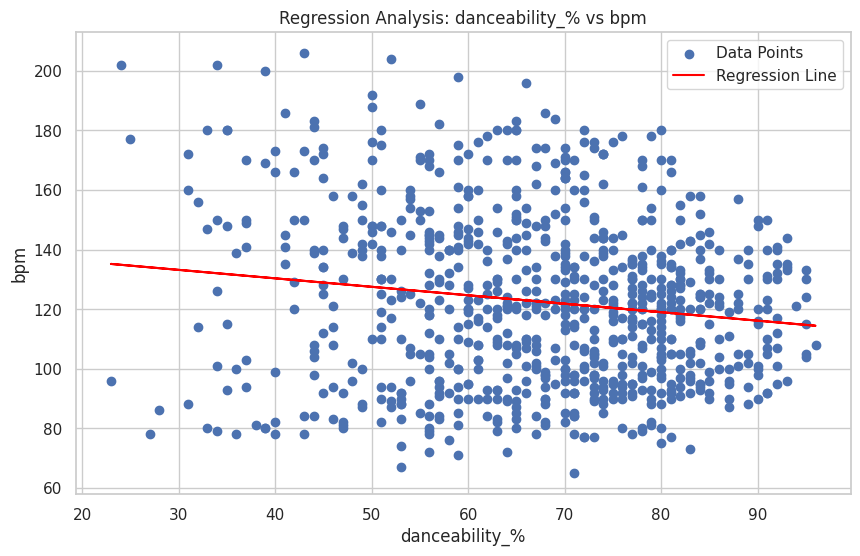

Regression analysis for instrumentalness_% and valence_%:
                            OLS Regression Results                            
Dep. Variable:              valence_%   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     18.01
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           2.45e-05
Time:                        19:48:07   Log-Likelihood:                -3733.3
No. Observations:                 817   AIC:                             7471.
Df Residuals:                     815   BIC:                             7480.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

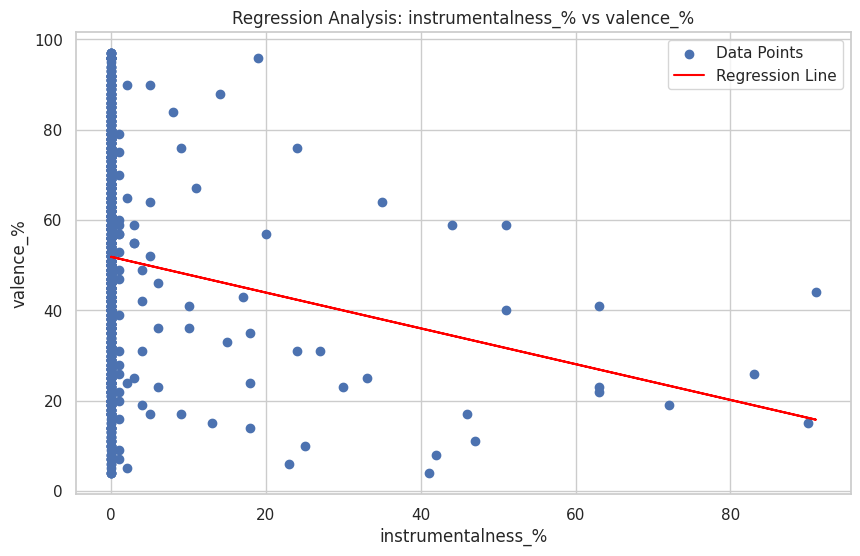

Regression analysis for acousticness_% and released_year:
                            OLS Regression Results                            
Dep. Variable:          released_year   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     14.73
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           0.000134
Time:                        19:48:07   Log-Likelihood:                -3097.8
No. Observations:                 817   AIC:                             6200.
Df Residuals:                     815   BIC:                             6209.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

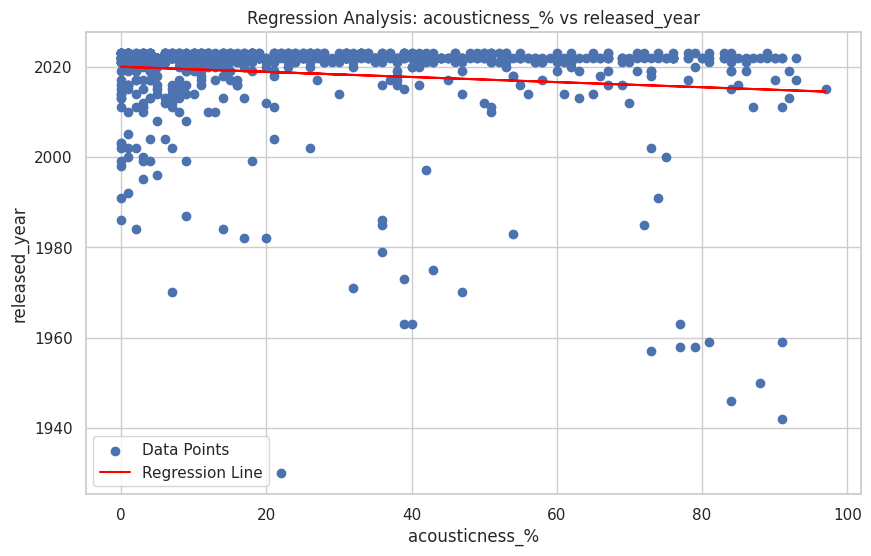

Regression analysis for valence_% and released_month:
                            OLS Regression Results                            
Dep. Variable:         released_month   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     10.05
Date:                Sun, 08 Dec 2024   Prob (F-statistic):            0.00158
Time:                        19:48:08   Log-Likelihood:                -2194.0
No. Observations:                 817   AIC:                             4392.
Df Residuals:                     815   BIC:                             4401.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

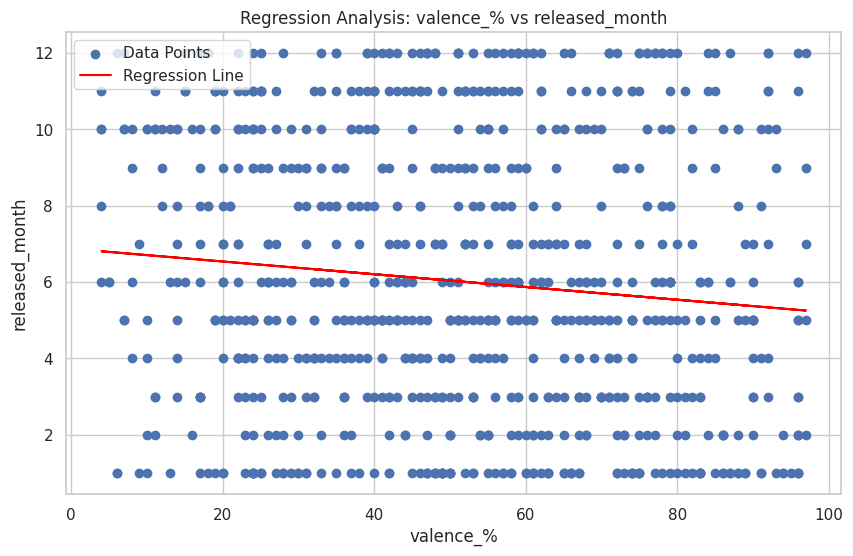

Regression analysis for speechiness_% and in_apple_playlists:
                            OLS Regression Results                            
Dep. Variable:     in_apple_playlists   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     7.846
Date:                Sun, 08 Dec 2024   Prob (F-statistic):            0.00521
Time:                        19:48:08   Log-Likelihood:                -4681.4
No. Observations:                 817   AIC:                             9367.
Df Residuals:                     815   BIC:                             9376.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

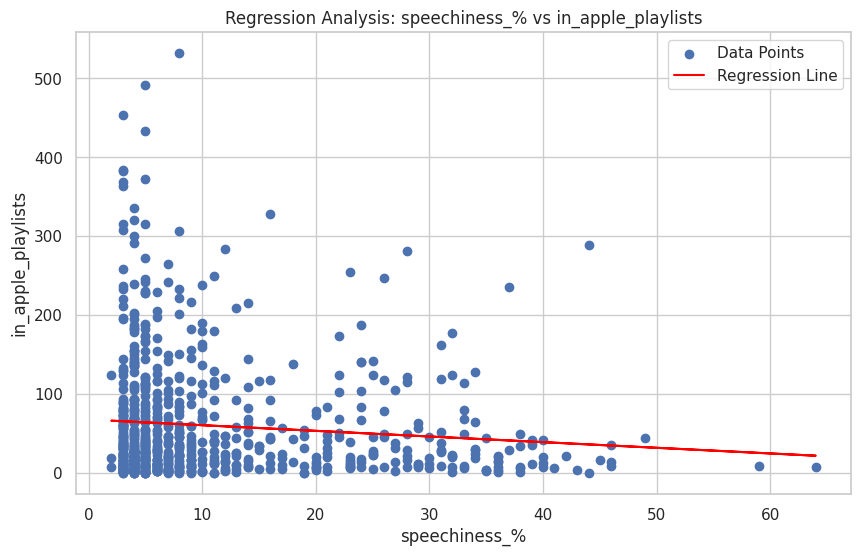

Regression analysis for danceability_% and in_spotify_playlists:
                             OLS Regression Results                             
Dep. Variable:     in_spotify_playlists   R-squared:                       0.009
Model:                              OLS   Adj. R-squared:                  0.008
Method:                   Least Squares   F-statistic:                     7.738
Date:                  Sun, 08 Dec 2024   Prob (F-statistic):            0.00553
Time:                          19:48:09   Log-Likelihood:                -8470.6
No. Observations:                   817   AIC:                         1.695e+04
Df Residuals:                       815   BIC:                         1.695e+04
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------

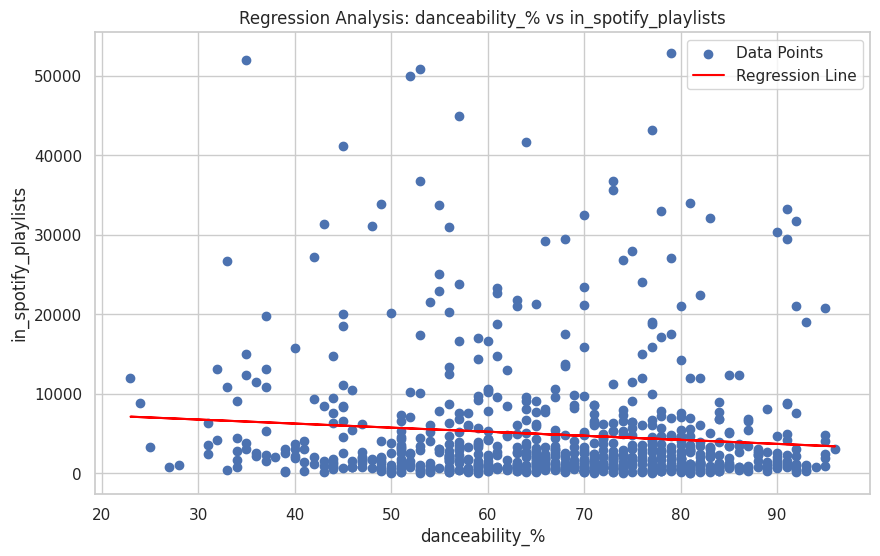

Regression analysis for in_spotify_playlists and released_month:
                            OLS Regression Results                            
Dep. Variable:         released_month   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     12.40
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           0.000454
Time:                        19:48:09   Log-Likelihood:                -2192.9
No. Observations:                 817   AIC:                             4390.
Df Residuals:                     815   BIC:                             4399.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

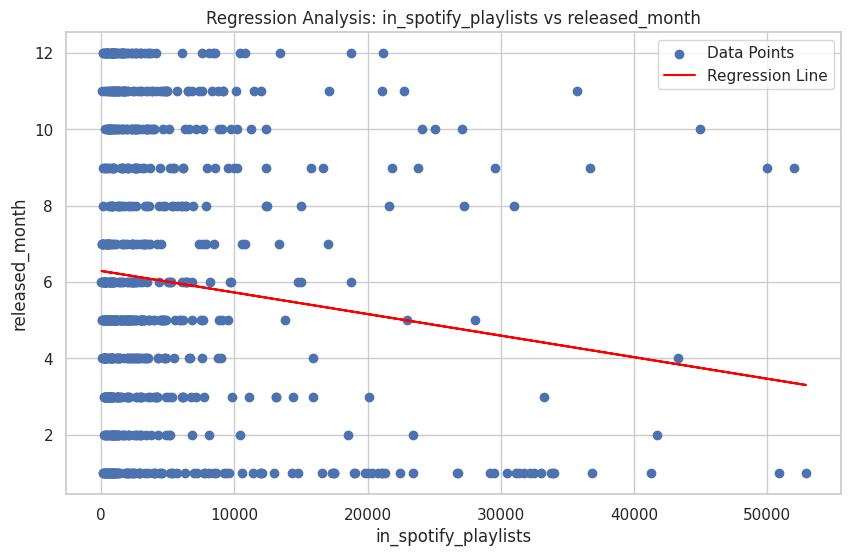

Regression analysis for in_spotify_playlists and artist_count:
                            OLS Regression Results                            
Dep. Variable:           artist_count   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     5.963
Date:                Sun, 08 Dec 2024   Prob (F-statistic):             0.0148
Time:                        19:48:09   Log-Likelihood:                -1047.8
No. Observations:                 817   AIC:                             2100.
Df Residuals:                     815   BIC:                             2109.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

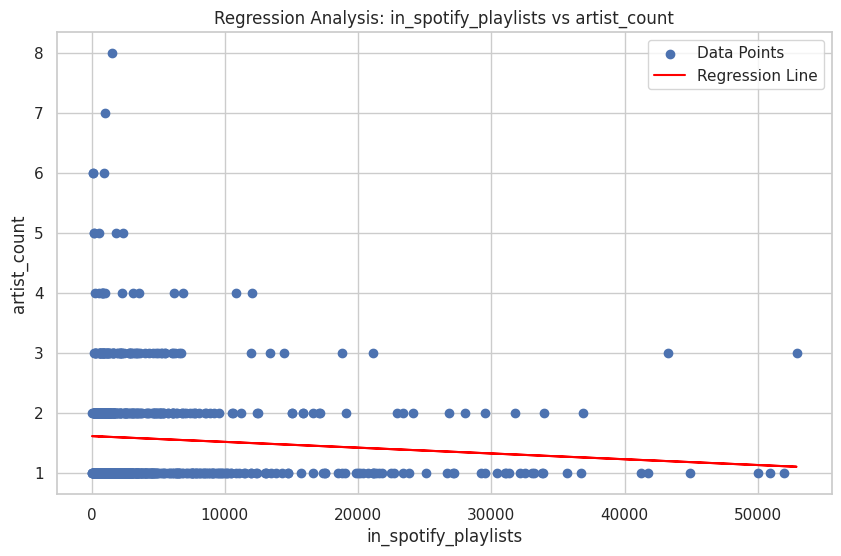

Regression analysis for acousticness_% and artist_count:
                            OLS Regression Results                            
Dep. Variable:           artist_count   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     7.376
Date:                Sun, 08 Dec 2024   Prob (F-statistic):            0.00675
Time:                        19:48:10   Log-Likelihood:                -1047.1
No. Observations:                 817   AIC:                             2098.
Df Residuals:                     815   BIC:                             2108.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

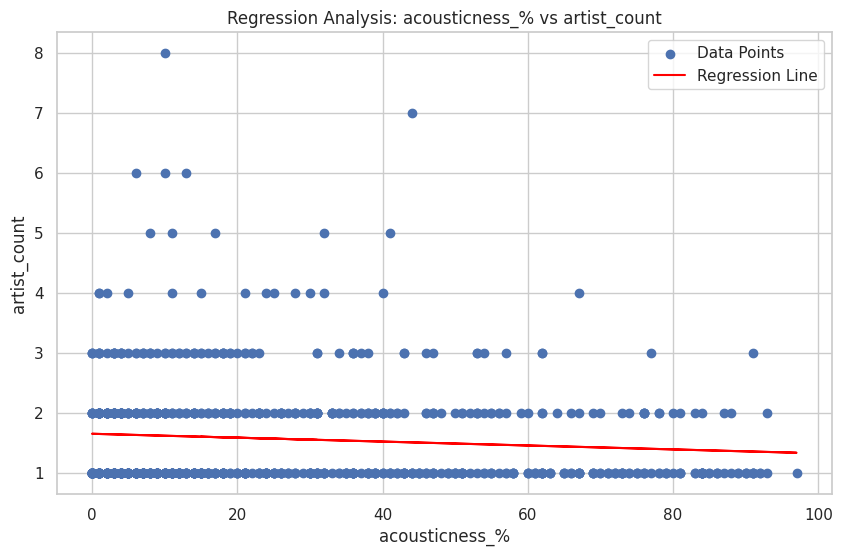

Regression analysis for speechiness_% and in_spotify_playlists:
                             OLS Regression Results                             
Dep. Variable:     in_spotify_playlists   R-squared:                       0.006
Model:                              OLS   Adj. R-squared:                  0.005
Method:                   Least Squares   F-statistic:                     4.939
Date:                  Sun, 08 Dec 2024   Prob (F-statistic):             0.0265
Time:                          19:48:10   Log-Likelihood:                -8472.0
No. Observations:                   817   AIC:                         1.695e+04
Df Residuals:                       815   BIC:                         1.696e+04
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------

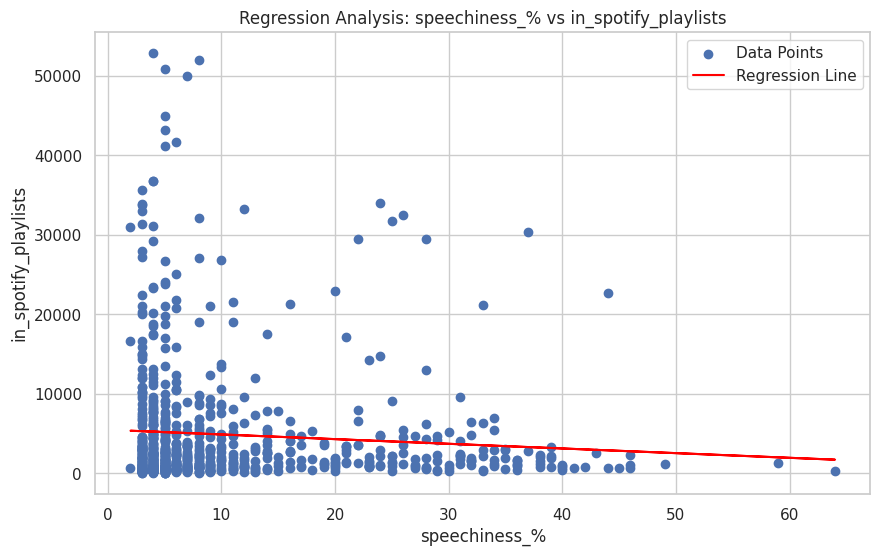

Regression analysis for instrumentalness_% and danceability_%:
                            OLS Regression Results                            
Dep. Variable:         danceability_%   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     8.593
Date:                Sun, 08 Dec 2024   Prob (F-statistic):            0.00347
Time:                        19:48:11   Log-Likelihood:                -3349.8
No. Observations:                 817   AIC:                             6704.
Df Residuals:                     815   BIC:                             6713.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

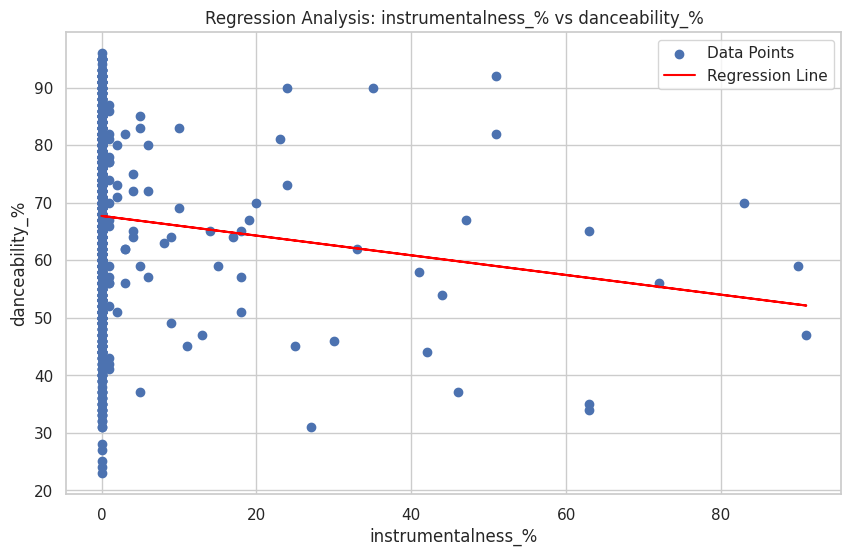

Regression analysis for in_apple_charts and artist_count:
                            OLS Regression Results                            
Dep. Variable:           artist_count   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     4.644
Date:                Sun, 08 Dec 2024   Prob (F-statistic):             0.0315
Time:                        19:48:11   Log-Likelihood:                -1048.5
No. Observations:                 817   AIC:                             2101.
Df Residuals:                     815   BIC:                             2110.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

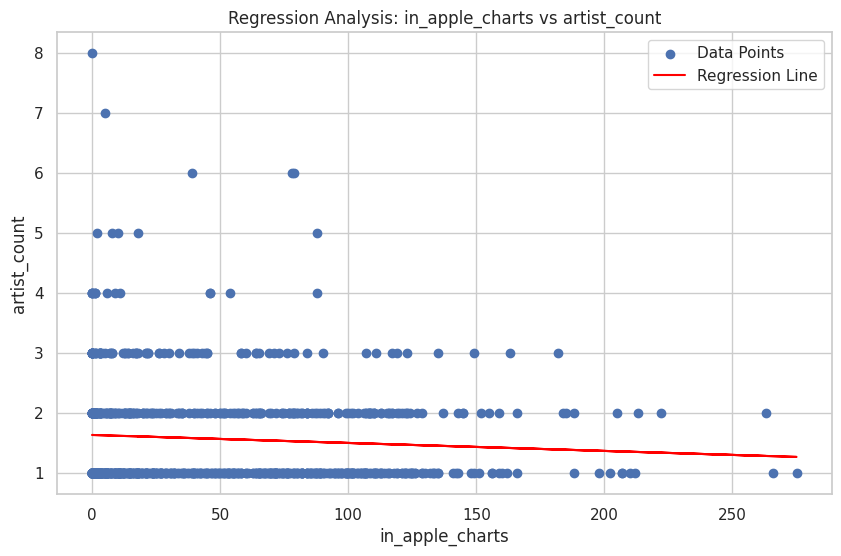

Regression analysis for energy_% and released_month:
                            OLS Regression Results                            
Dep. Variable:         released_month   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     6.201
Date:                Sun, 08 Dec 2024   Prob (F-statistic):             0.0130
Time:                        19:48:11   Log-Likelihood:                -2195.9
No. Observations:                 817   AIC:                             4396.
Df Residuals:                     815   BIC:                             4405.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

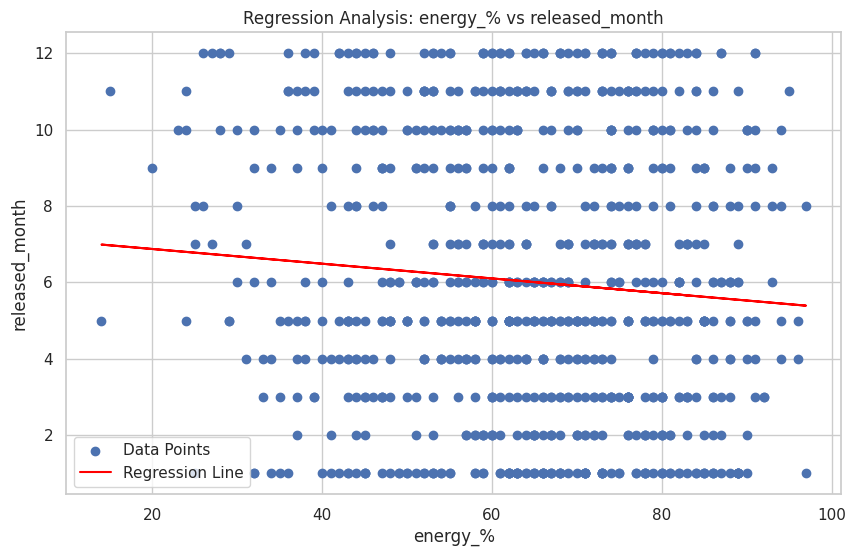

Regression analysis for speechiness_% and instrumentalness_%:
                            OLS Regression Results                            
Dep. Variable:     instrumentalness_%   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     6.804
Date:                Sun, 08 Dec 2024   Prob (F-statistic):            0.00926
Time:                        19:48:12   Log-Likelihood:                -2929.1
No. Observations:                 817   AIC:                             5862.
Df Residuals:                     815   BIC:                             5872.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

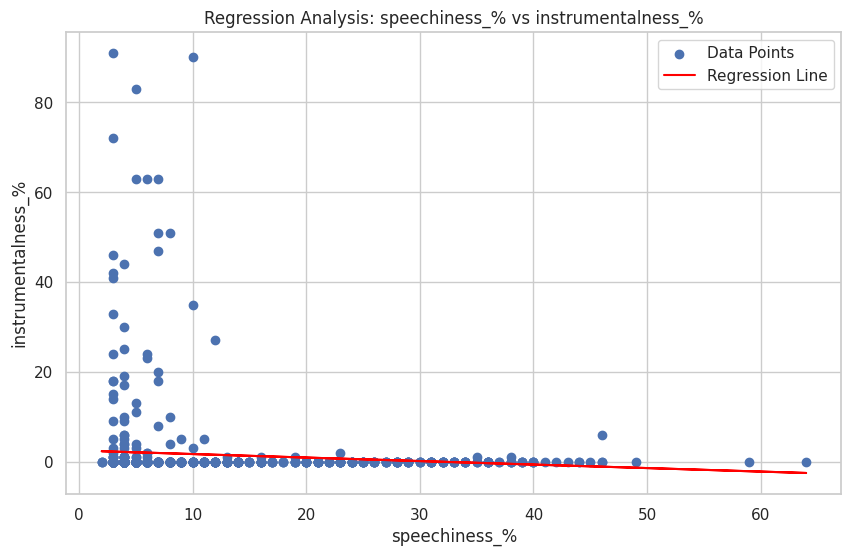

Regression analysis for acousticness_% and valence_%:
                            OLS Regression Results                            
Dep. Variable:              valence_%   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     3.360
Date:                Sun, 08 Dec 2024   Prob (F-statistic):             0.0672
Time:                        19:48:12   Log-Likelihood:                -3740.6
No. Observations:                 817   AIC:                             7485.
Df Residuals:                     815   BIC:                             7495.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

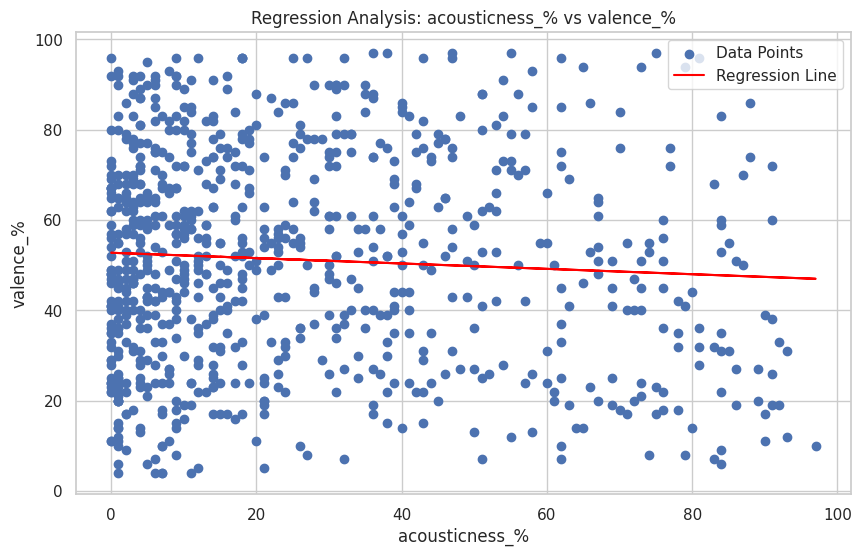

In [16]:
# Perform regression analysis on the best pairs

for (var1, var2) in to_analyze:
    X = cleaned_data[[var1]]
    y = cleaned_data[var2]
    X = sm.add_constant(X)  # Adds a constant term to the predictor
    model = sm.OLS(y, X).fit()
    print(f"Regression analysis for {var1} and {var2}:")
    print(model.summary())
    print()

    # Plot the regression line and data points
    plt.figure(figsize=(10, 6))
    plt.scatter(cleaned_data[var1], cleaned_data[var2], label='Data Points')
    plt.plot(cleaned_data[var1], model.predict(X), color='red', label='Regression Line')
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.title(f'Regression Analysis: {var1} vs {var2}')
    plt.legend()
    plt.show()

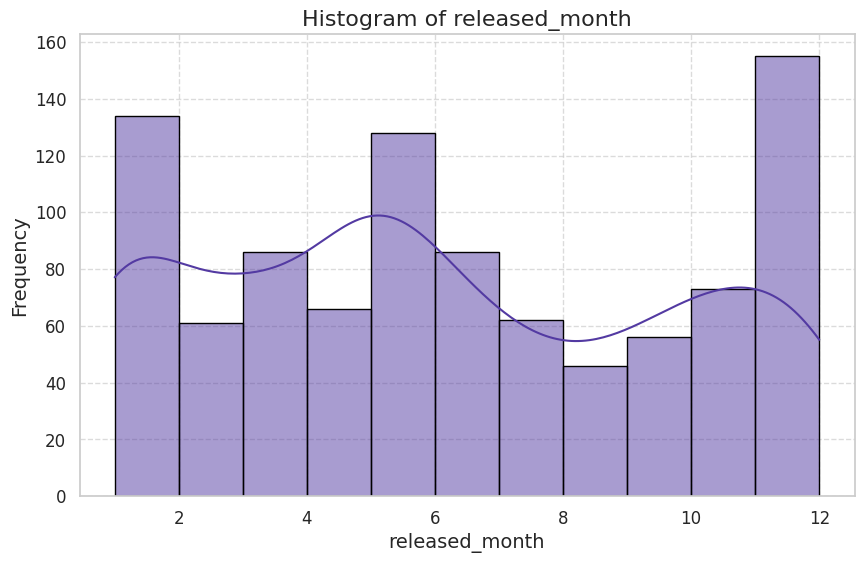

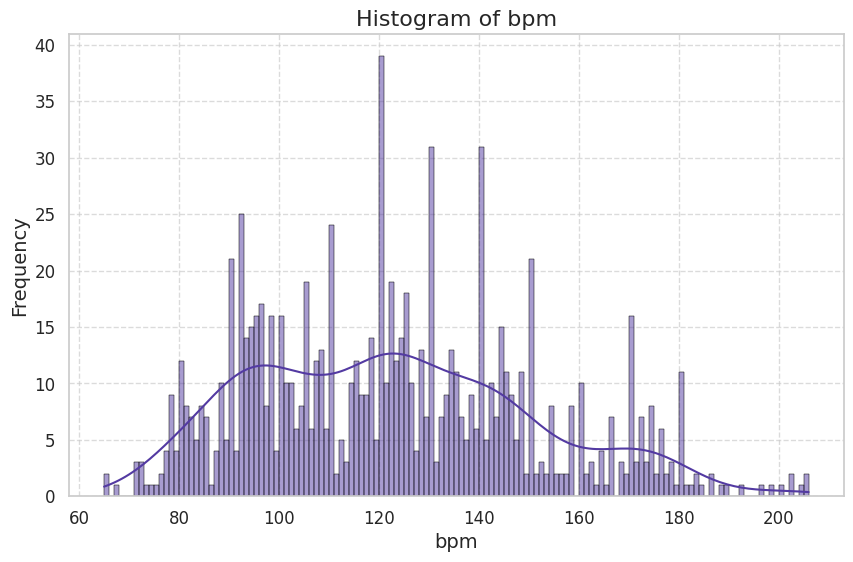

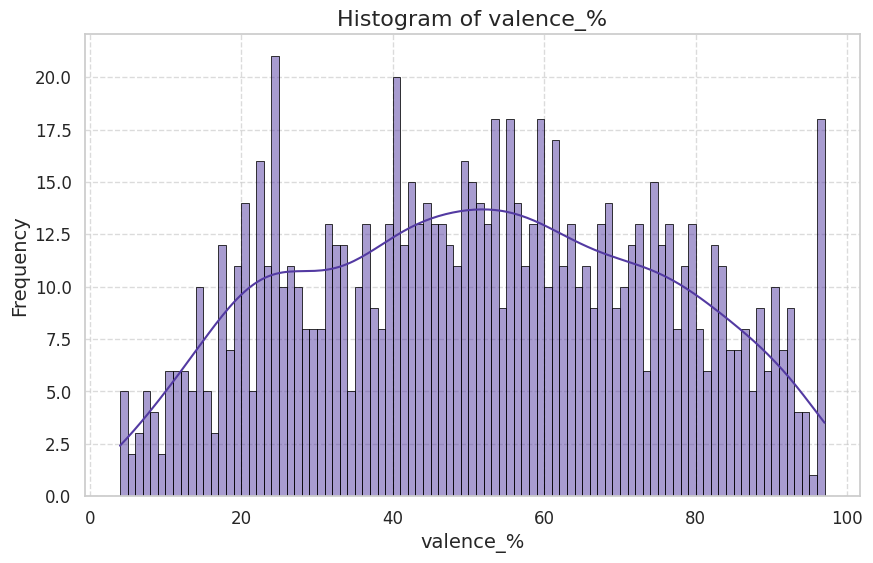

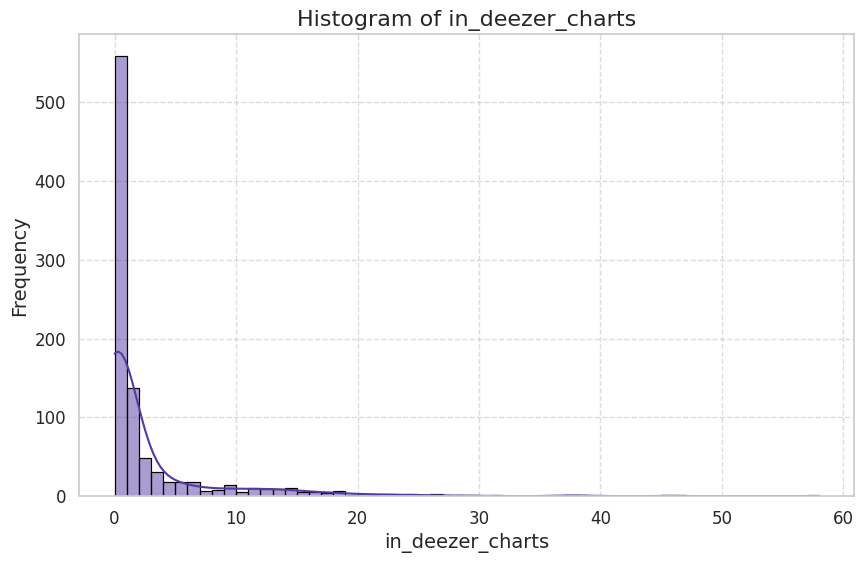

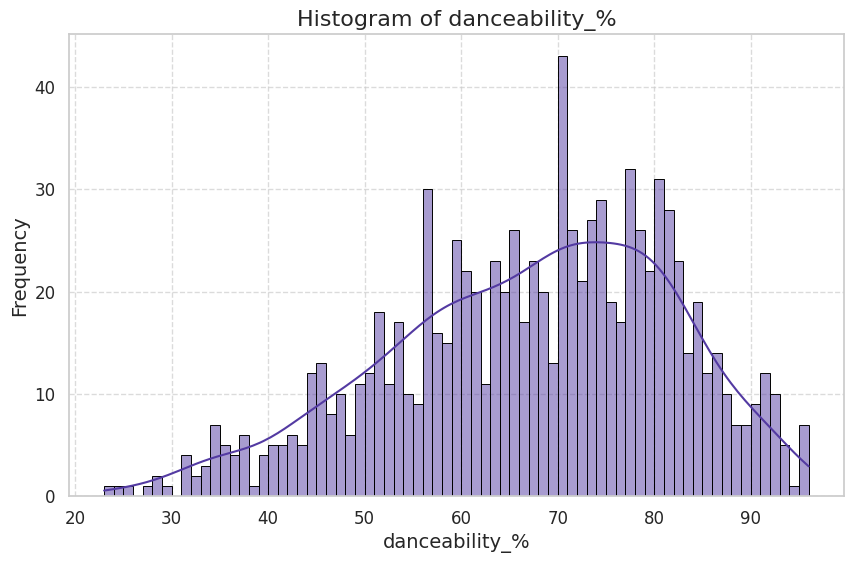

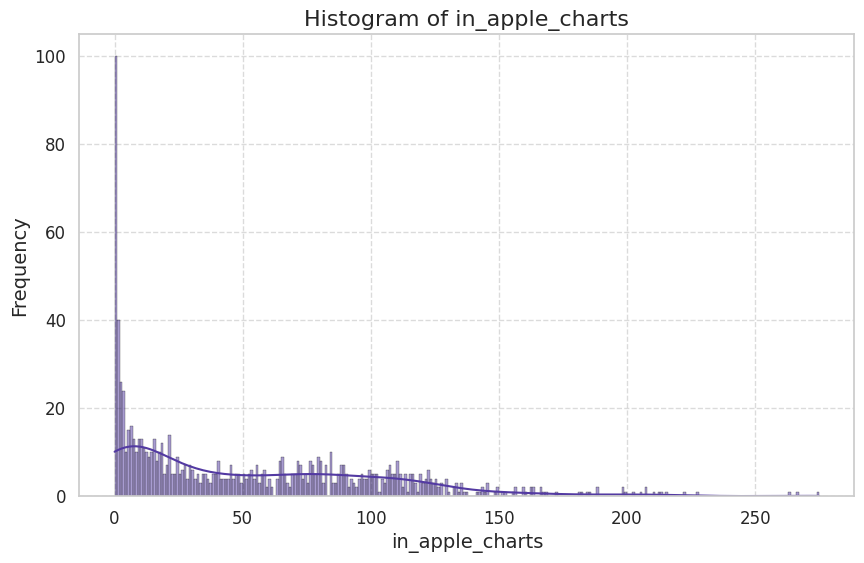

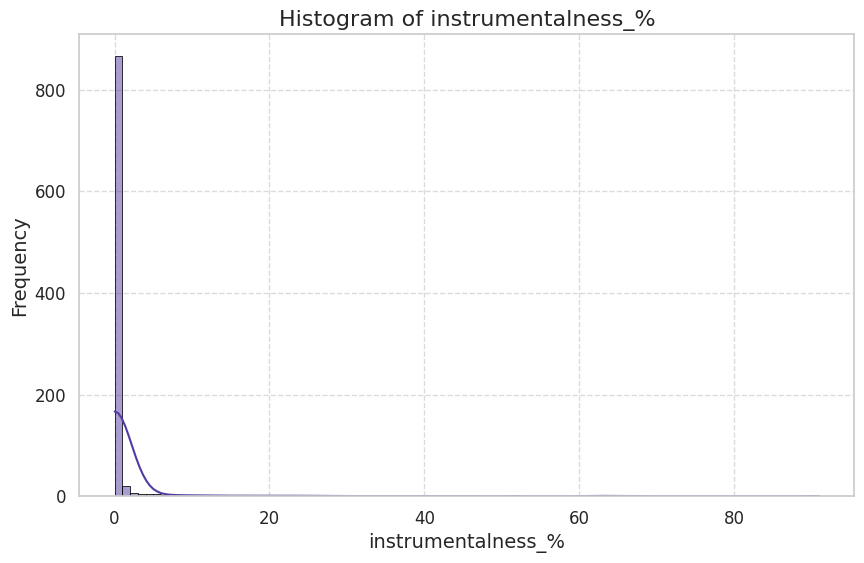

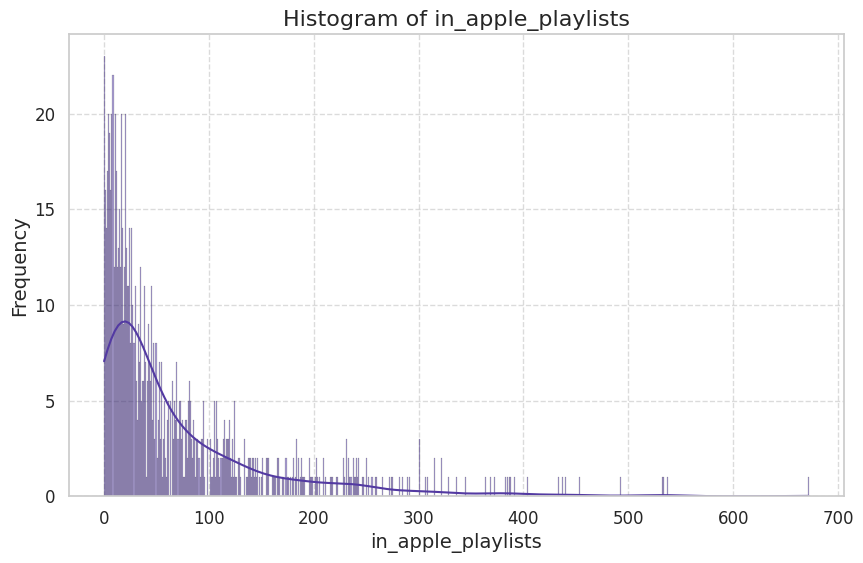

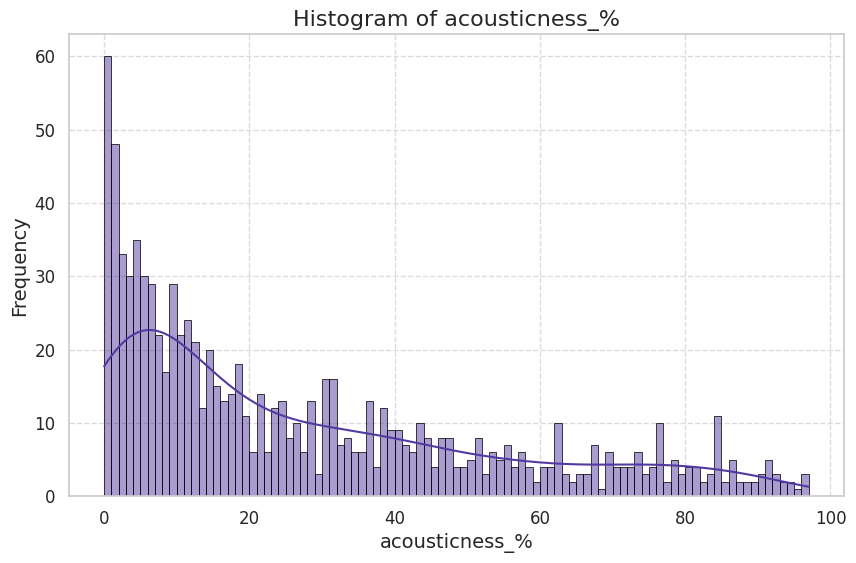

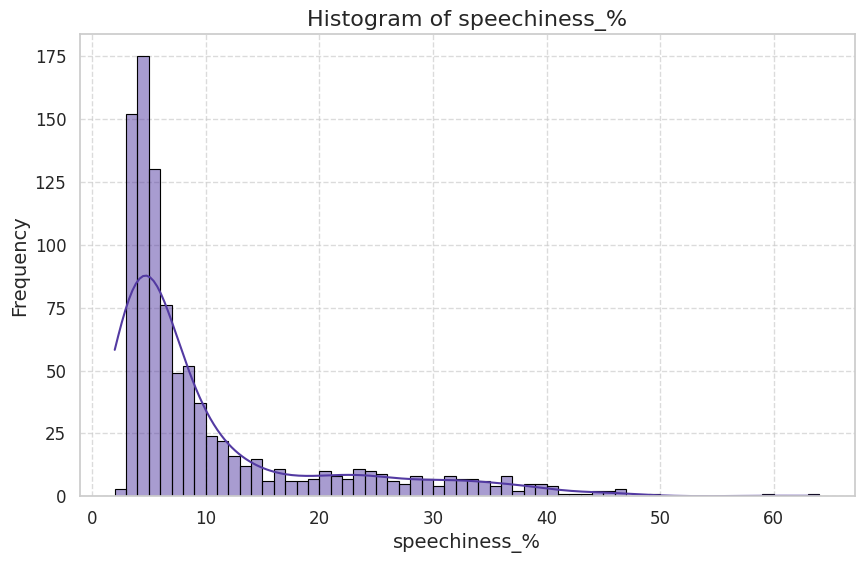

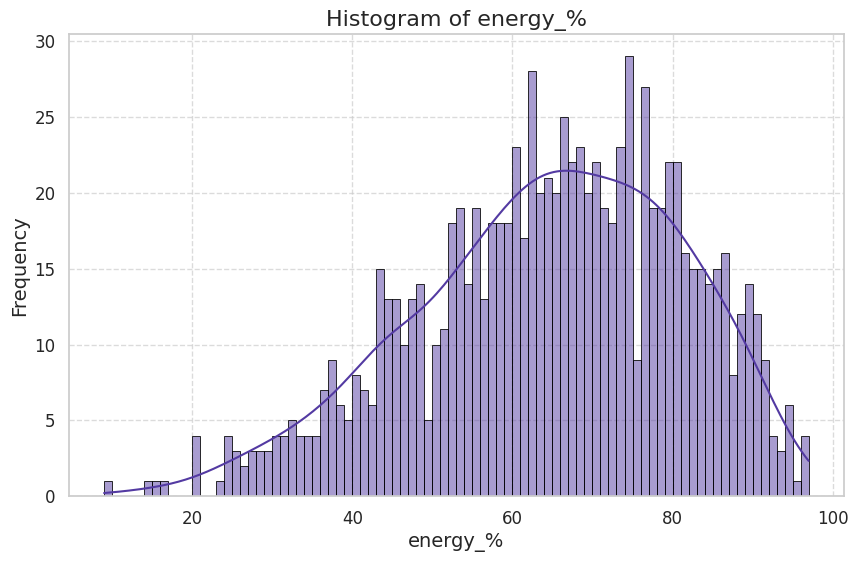

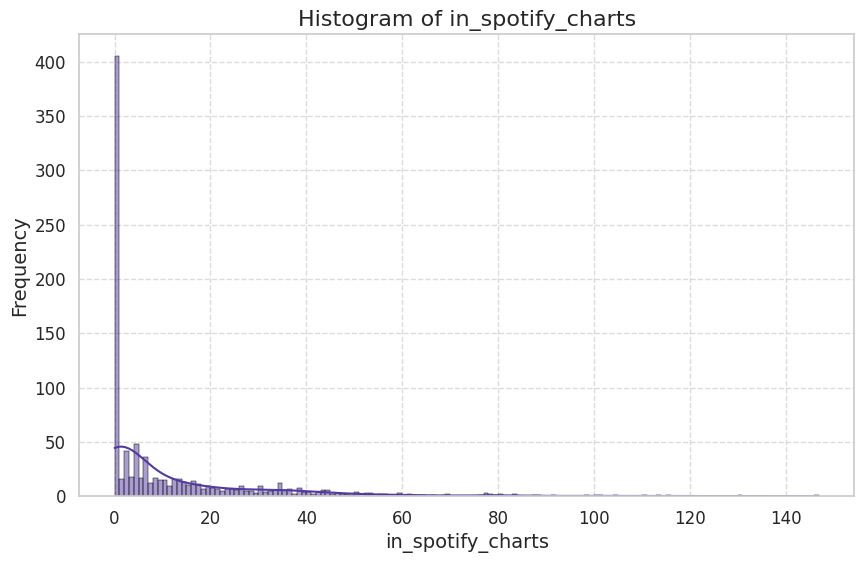

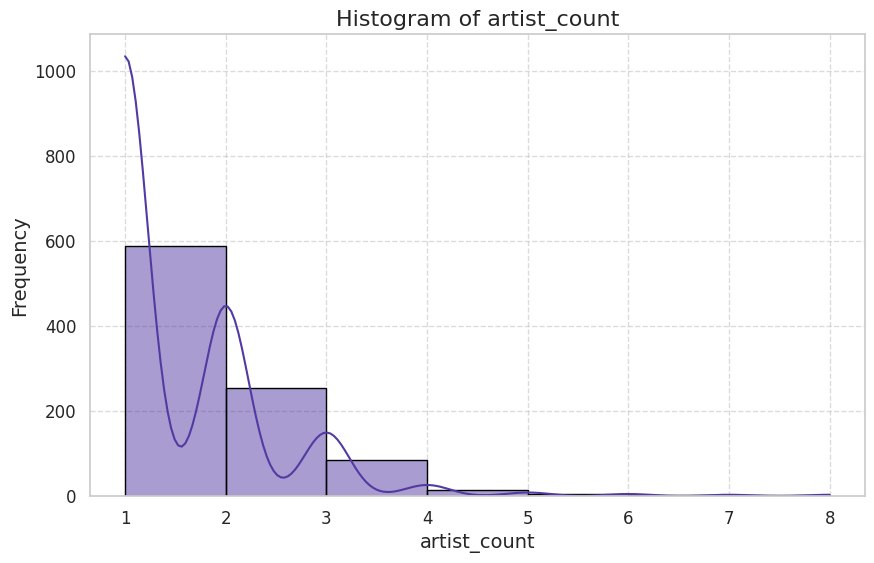

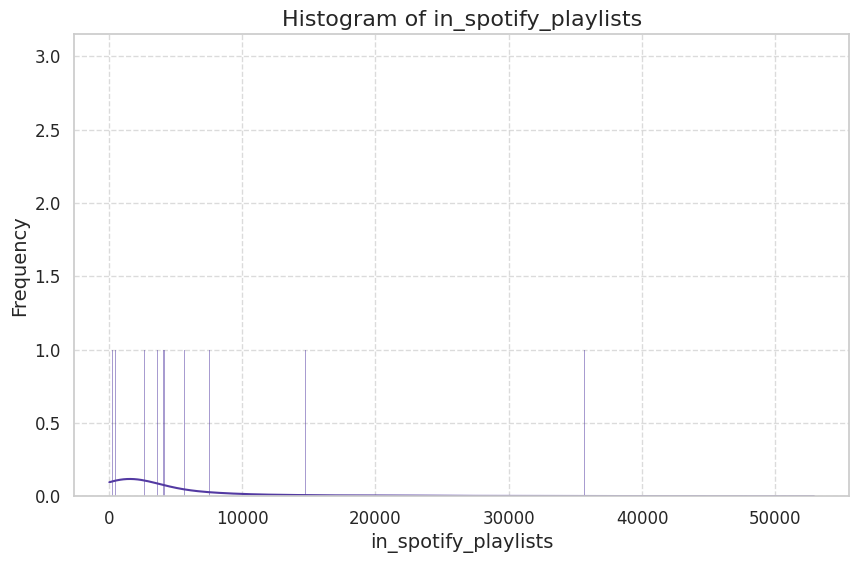

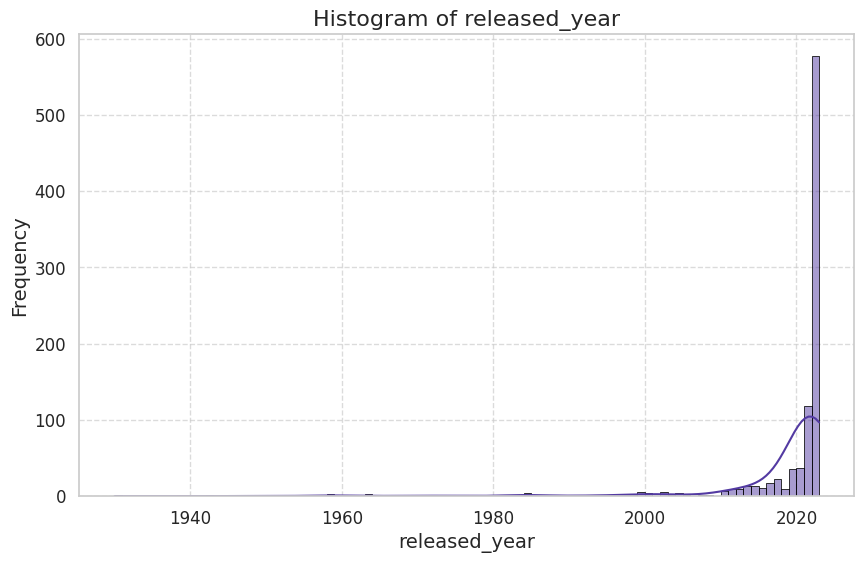

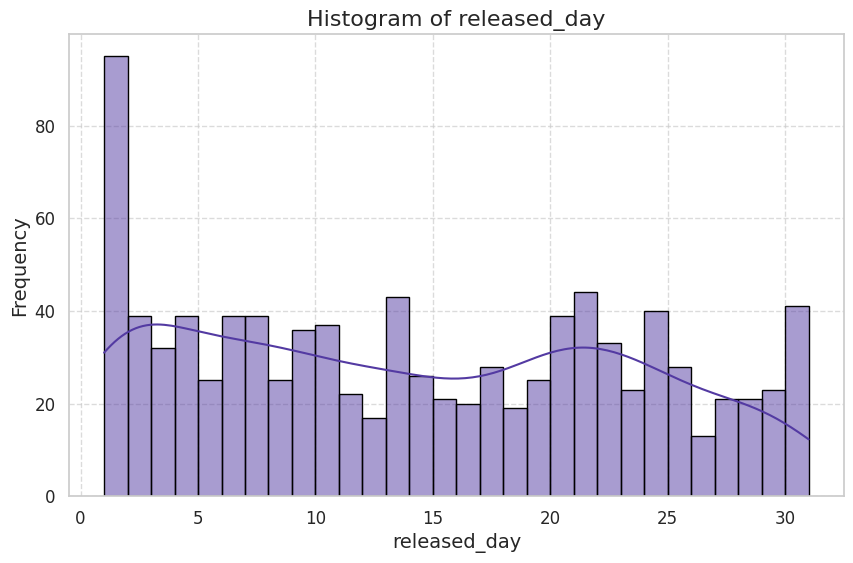

In [15]:
# Set Seaborn style
sns.set(style="whitegrid")

to_analyze = []
to_analyze.extend(sorted_pairs.index)
to_analyze.extend(inv_sorted_pairs.index)
variables = set([var for pair in to_analyze for var in pair])

for var in variables:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=data, x=var, kde=True, binwidth=1, color='#533aa2', edgecolor='black')
    plt.title(f'Histogram of {var}', fontsize=16)
    plt.xlabel(var, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

Average in_apple_playlists by in_spotify_playlists:
     in_spotify_playlists  in_apple_playlists
0                      31            2.000000
1                      34            0.000000
2                      58            2.000000
3                      67            7.000000
4                      77            8.000000
5                      86            7.000000
6                      99           21.000000
7                     105            5.000000
8                     130           21.000000
9                     134            4.000000
10                    138           13.000000
11                    139           16.000000
12                    148           32.000000
13                    158            5.000000
14                    161           10.000000
15                    162            1.000000
16                    166            2.000000
17                    168            0.000000
18                    178            6.000000
19                    181   

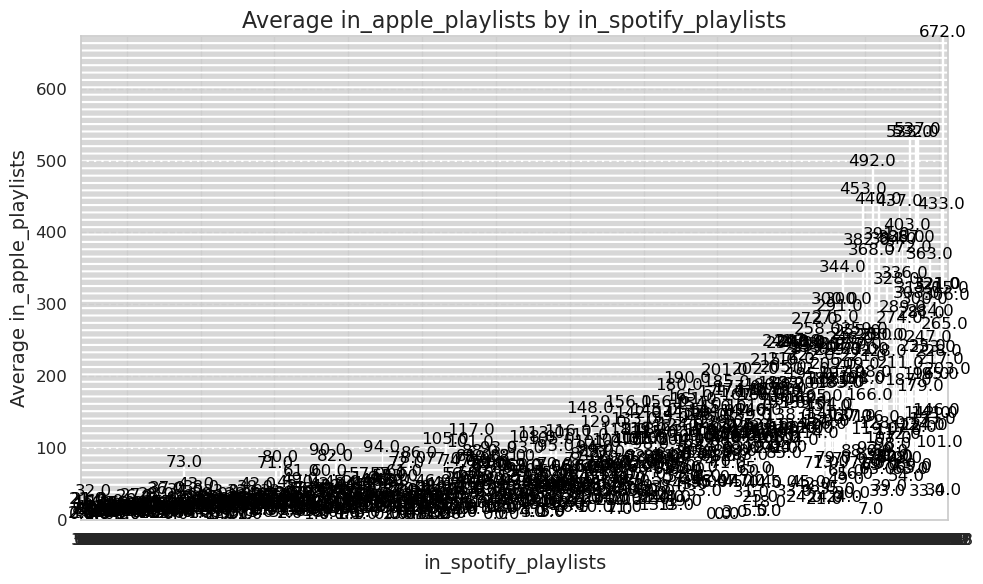

Average in_deezer_charts by in_spotify_charts:
    in_spotify_charts  in_deezer_charts
0                   0          0.725926
1                   1          0.312500
2                   2          0.714286
3                   3          1.000000
4                   4          1.333333
5                   5          0.705882
6                   6          1.416667
7                   7          2.500000
8                   8          3.235294
9                   9          1.933333
10                 10          4.800000
11                 11          0.666667
12                 12          3.062500
13                 13          1.562500
14                 14          1.923077
15                 15          2.500000
16                 16          2.500000
17                 17          4.818182
18                 18          5.000000
19                 19          1.555556
20                 20          4.000000
21                 21          2.571429
22                 22          2.

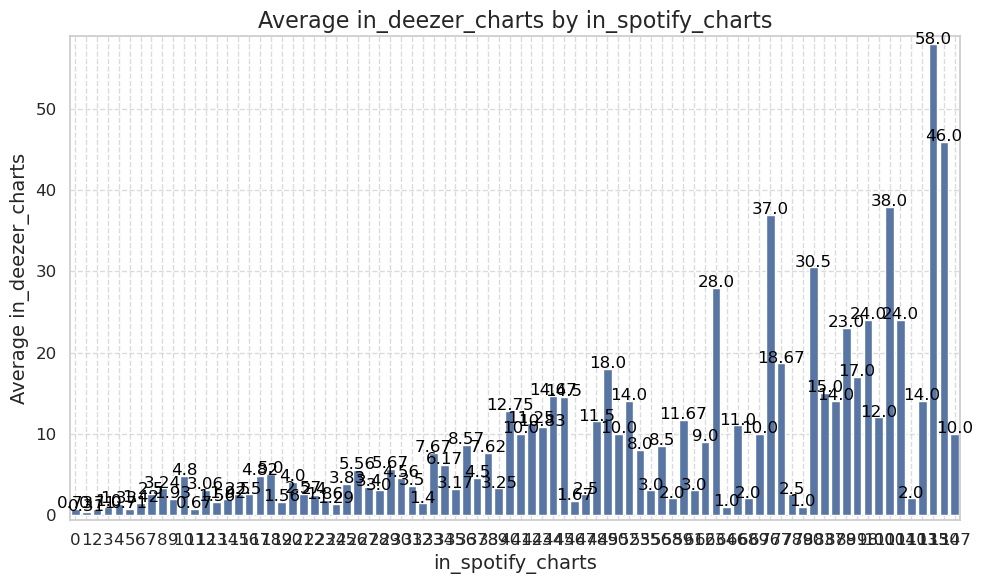

Average in_apple_charts by in_spotify_charts:
    in_spotify_charts  in_apple_charts
0                   0        28.459259
1                   1        32.375000
2                   2        42.952381
3                   3        43.833333
4                   4        40.062500
5                   5        61.882353
6                   6        59.916667
7                   7        40.833333
8                   8        54.647059
9                   9        54.800000
10                 10        57.400000
11                 11        30.111111
12                 12        94.562500
13                 13        48.750000
14                 14        49.692308
15                 15        66.100000
16                 16        61.857143
17                 17        74.454545
18                 18        82.142857
19                 19        75.333333
20                 20        51.625000
21                 21        99.142857
22                 22        74.600000
23                

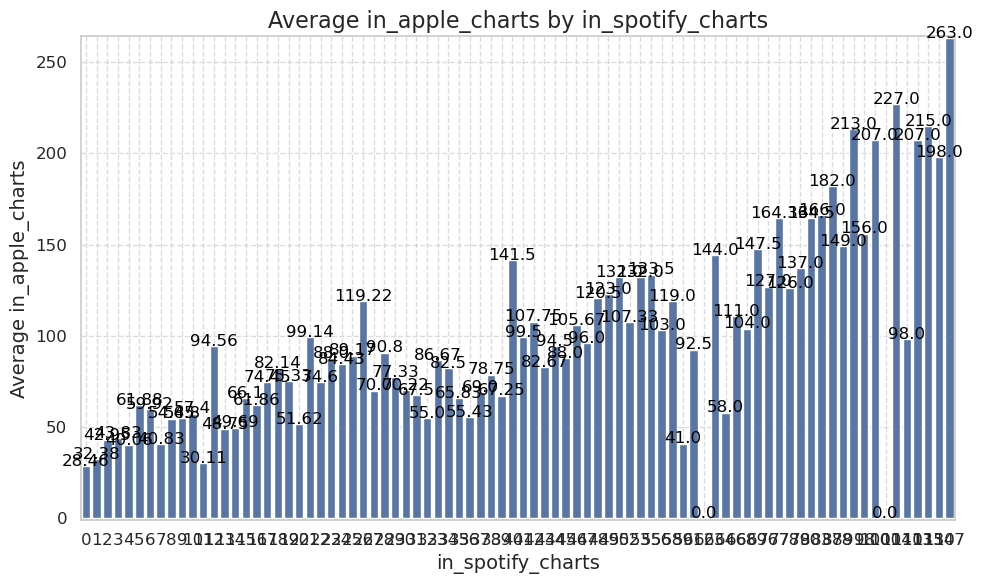

Average in_apple_charts by in_apple_playlists:
     in_apple_playlists  in_apple_charts
0                     0         1.478261
1                     1        11.125000
2                     2        33.785714
3                     3        17.764706
4                     4        29.400000
5                     5        21.210526
6                     6        34.562500
7                     7        20.250000
8                     8        51.181818
9                     9        20.083333
10                   10        36.950000
11                   11        41.823529
12                   12        25.250000
13                   13        36.384615
14                   14        46.133333
15                   15        37.250000
16                   16        50.850000
17                   17        47.071429
18                   18        59.888889
19                   19        45.833333
20                   20        53.750000
21                   21        33.461538
22        

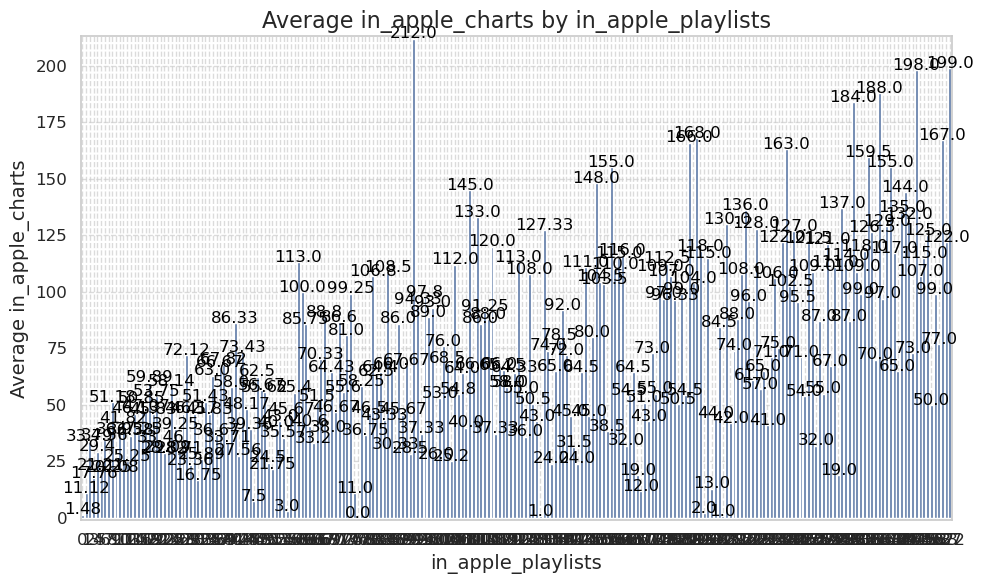

Average valence_% by danceability_%:
    danceability_%  valence_%
0               23  19.000000
1               24  76.000000
2               25  17.000000
3               27  10.000000
4               28  19.500000
5               29  12.000000
6               31  24.000000
7               32  33.000000
8               33  42.666667
9               34  30.000000
10              35  27.600000
11              36  23.000000
12              37  20.000000
13              38  20.000000
14              39  33.250000
15              40  26.600000
16              41  26.600000
17              42  28.666667
18              43  38.800000
19              44  33.000000
20              45  29.307692
21              46  47.875000
22              47  37.600000
23              48  41.833333
24              49  34.636364
25              50  48.750000
26              51  43.277778
27              52  42.818182
28              53  46.588235
29              54  43.000000
30              55  46.444444
31 

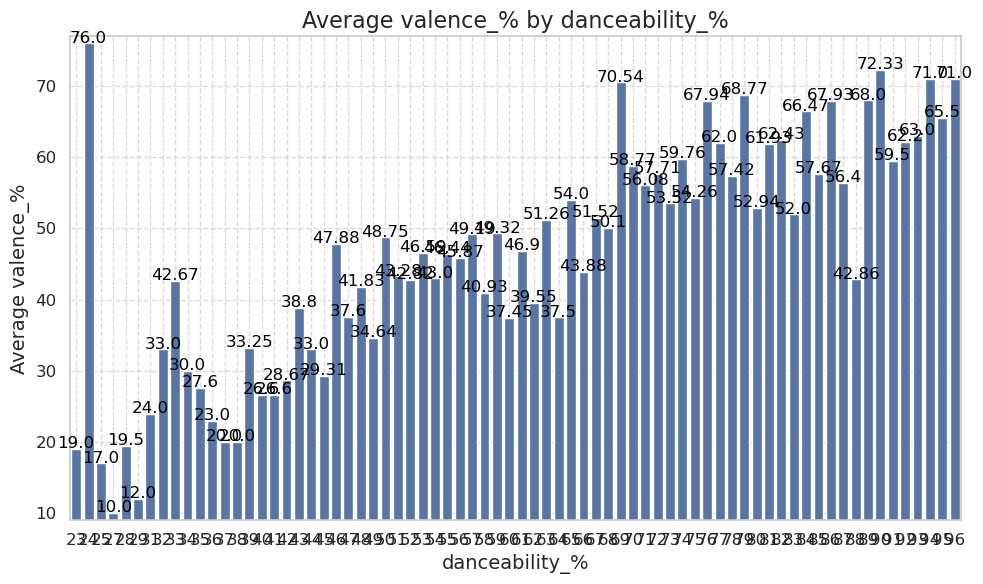

Average in_deezer_charts by in_apple_charts:
     in_apple_charts  in_deezer_charts
0                  0          1.110000
1                  1          0.550000
2                  2          1.384615
3                  3          0.541667
4                  4          0.300000
5                  5          0.133333
6                  6          0.437500
7                  7          1.692308
8                  8          0.600000
9                  9          0.153846
10                10          0.384615
11                11          0.181818
12                12          3.900000
13                13          0.222222
14                14          1.100000
15                15          0.384615
16                16          1.000000
17                17          1.300000
18                18          0.416667
19                19          3.000000
20                20          0.000000
21                21          1.214286
22                22          0.800000
23                2

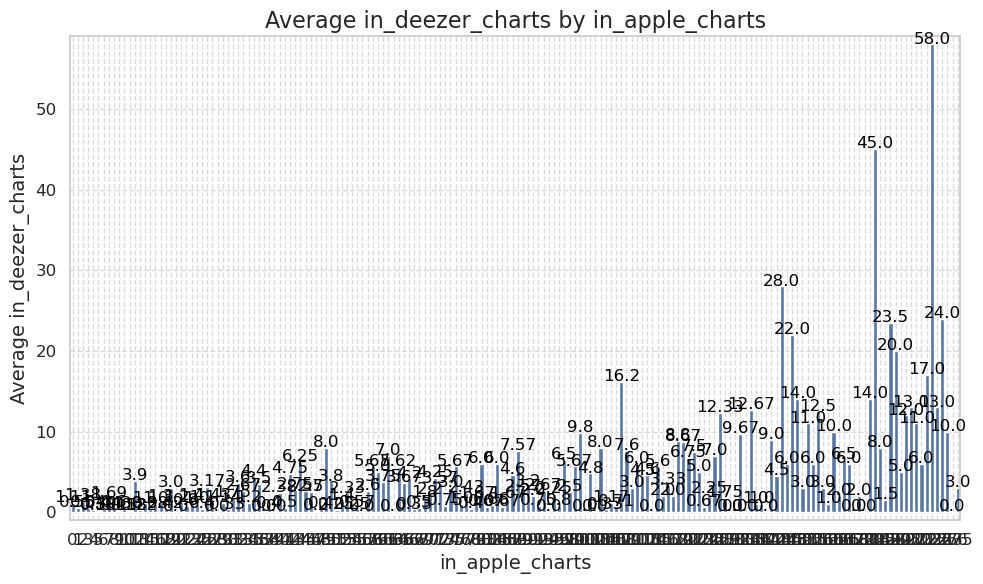

Average in_deezer_charts by in_apple_playlists:
     in_apple_playlists  in_deezer_charts
0                     0          2.391304
1                     1          0.000000
2                     2          0.142857
3                     3          0.176471
4                     4          0.600000
5                     5          0.263158
6                     6          0.687500
7                     7          0.300000
8                     8          0.954545
9                     9          0.583333
10                   10          0.450000
11                   11          0.588235
12                   12          0.833333
13                   13          0.384615
14                   14          1.066667
15                   15          1.000000
16                   16          0.750000
17                   17          1.928571
18                   18          0.222222
19                   19          2.000000
20                   20          1.750000
21                   21     

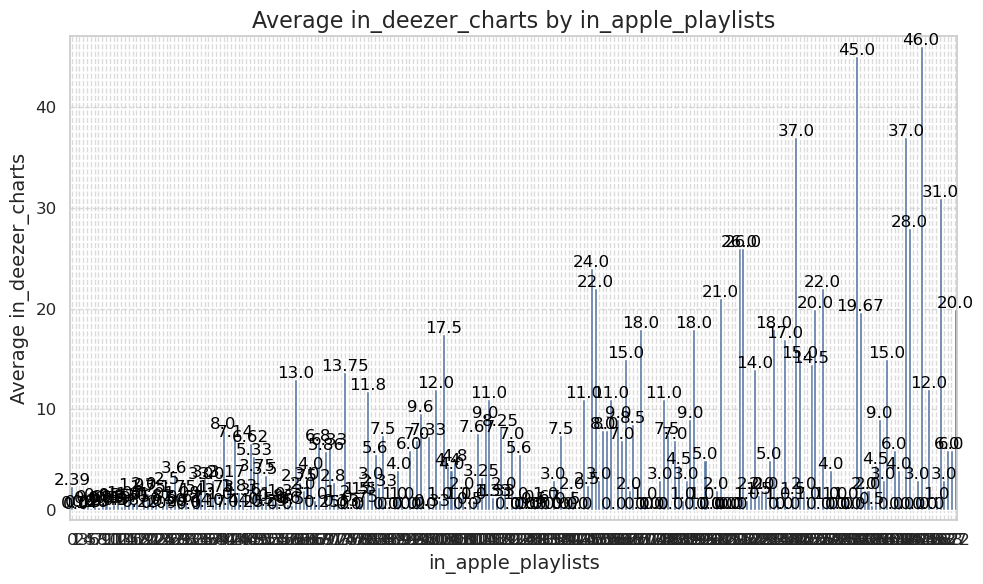

Average energy_% by valence_%:
    valence_%   energy_%
0           4  60.200000
1           5  49.000000
2           6  61.333333
3           7  45.200000
4           8  40.000000
5           9  43.000000
6          10  55.666667
7          11  51.833333
8          12  41.000000
9          13  51.800000
10         14  51.300000
11         15  51.400000
12         16  50.666667
13         17  53.583333
14         18  46.000000
15         19  44.727273
16         20  63.642857
17         21  51.400000
18         22  53.000000
19         23  58.181818
20         24  60.000000
21         25  62.200000
22         26  59.727273
23         27  51.600000
24         28  57.000000
25         29  66.500000
26         30  66.750000
27         31  55.230769
28         32  61.083333
29         33  54.583333
30         34  68.000000
31         35  67.700000
32         36  60.384615
33         37  59.888889
34         38  73.250000
35         39  58.615385
36         40  61.100000
37         41  62.2

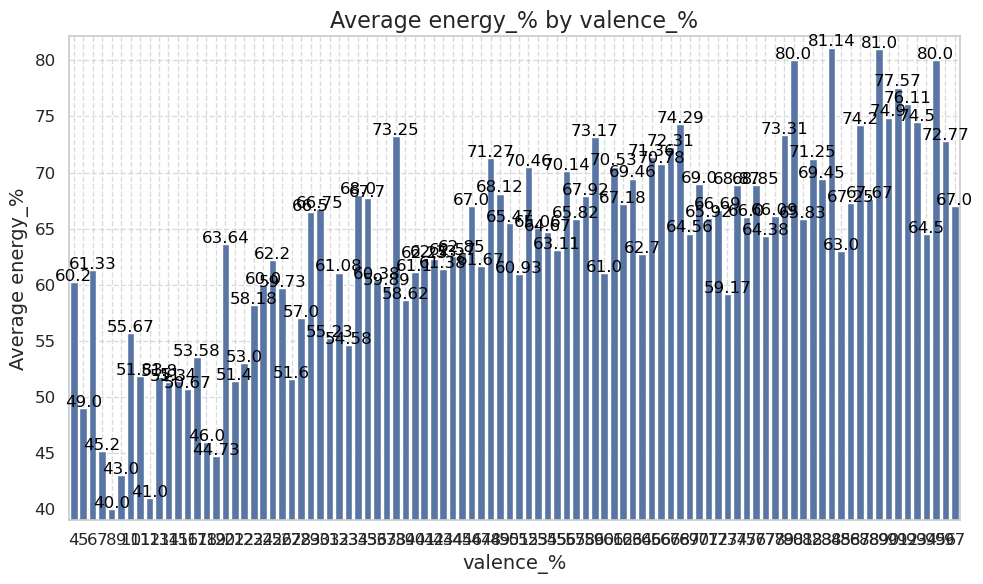

Average in_apple_charts by in_spotify_playlists:
     in_spotify_playlists  in_apple_charts
0                      31       107.000000
1                      34         0.000000
2                      58       106.000000
3                      67        10.000000
4                      77       166.000000
5                      86        70.000000
6                      99        52.000000
7                     105         9.000000
8                     130        79.000000
9                     134         6.000000
10                    138        78.000000
11                    139        72.000000
12                    148        93.000000
13                    158         6.000000
14                    161        79.000000
15                    162        10.000000
16                    166        10.000000
17                    168         0.000000
18                    178        71.000000
19                    181        14.000000
20                    182        88.000000
21   

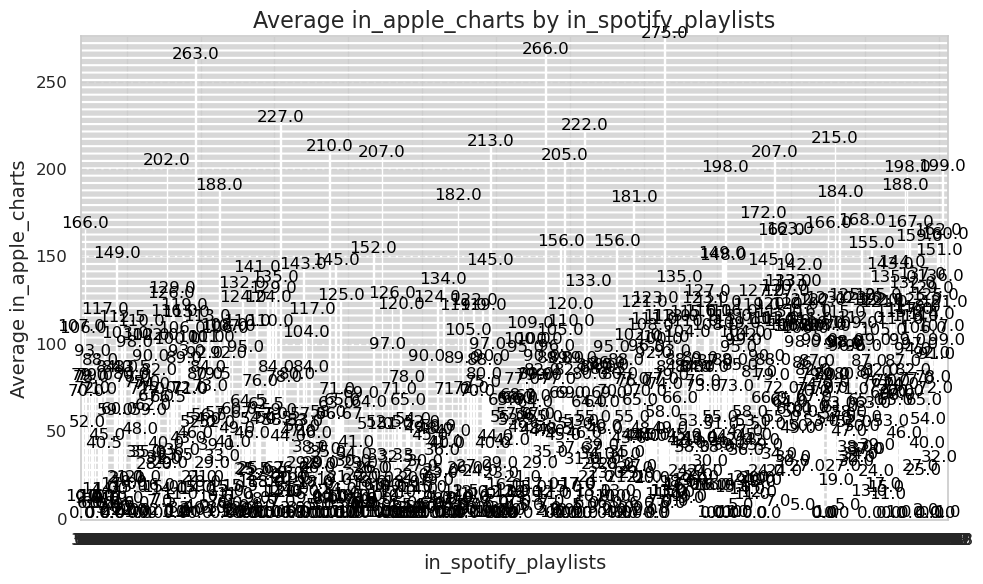

Average in_apple_playlists by in_spotify_charts:
    in_spotify_charts  in_apple_playlists
0                   0           57.106173
1                   1           67.125000
2                   2           53.071429
3                   3           69.888889
4                   4           34.916667
5                   5           76.882353
6                   6           66.111111
7                   7           65.750000
8                   8           80.000000
9                   9           56.733333
10                 10           91.933333
11                 11           25.222222
12                 12           66.812500
13                 13           73.750000
14                 14           34.076923
15                 15           80.100000
16                 16           84.071429
17                 17           70.545455
18                 18           61.285714
19                 19           65.666667
20                 20           58.750000
21                 21      

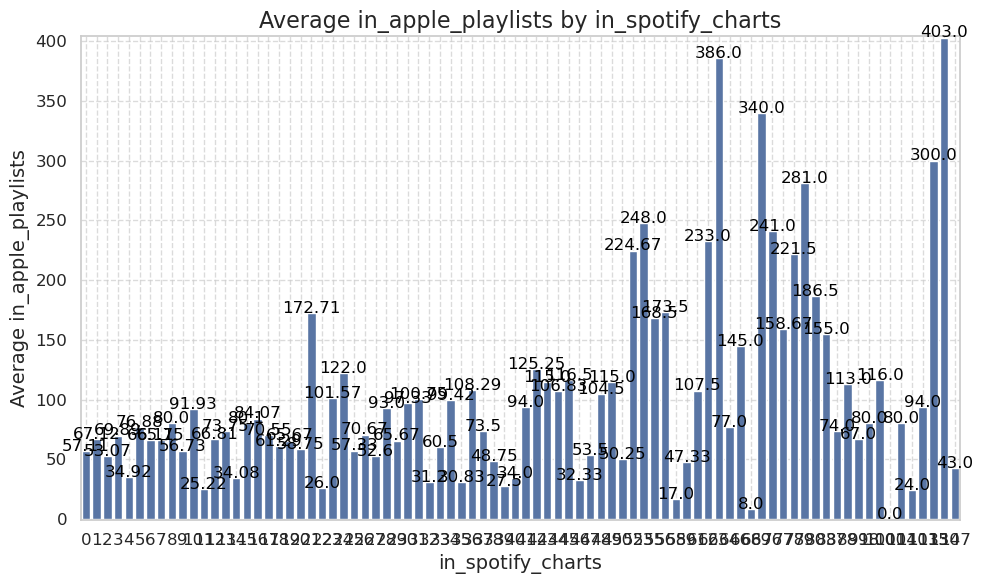

Average acousticness_% by energy_%:
    energy_%  acousticness_%
0          9       96.000000
1         14       67.000000
2         15       84.000000
3         16       97.000000
4         20       66.250000
5         23       91.000000
6         24       82.500000
7         25       84.333333
8         26       88.500000
9         27       84.333333
10        28       63.000000
11        29       79.333333
12        30       74.750000
13        31       73.500000
14        32       81.400000
15        33       72.000000
16        34       52.500000
17        35       73.000000
18        36       54.571429
19        37       59.555556
20        38       70.666667
21        39       30.800000
22        40       51.625000
23        41       45.571429
24        42       40.666667
25        43       57.066667
26        44       51.846154
27        45       44.846154
28        46       36.000000
29        47       32.076923
30        48       42.214286
31        49       39.400000
32     

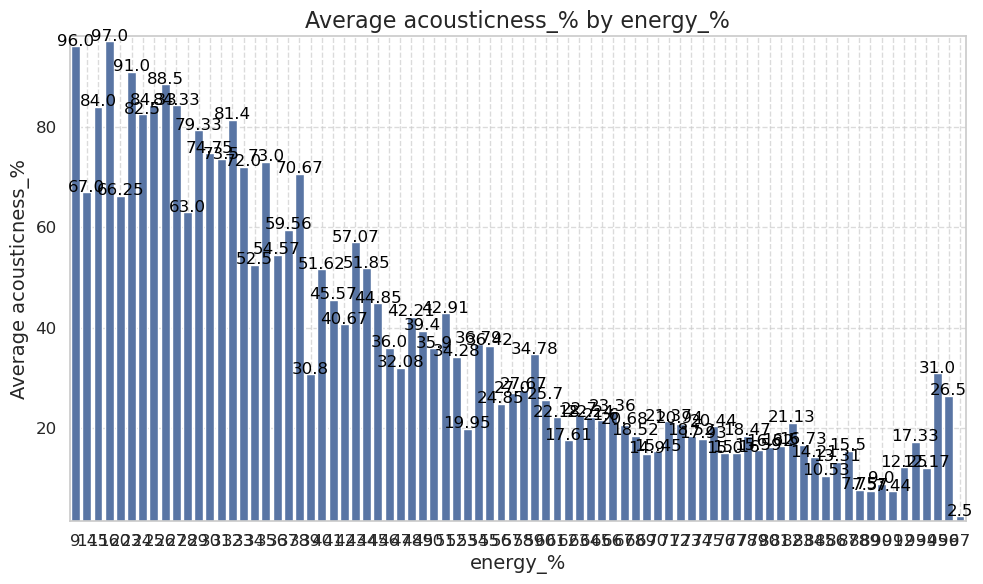

Average in_spotify_playlists by released_year:
    released_year  in_spotify_playlists
0            1930            323.000000
1            1942          11940.000000
2            1946          11500.000000
3            1950          10585.000000
4            1952           7930.000000
5            1957           7326.000000
6            1958           9965.333333
7            1959           4905.500000
8            1963           9371.666667
9            1968          15890.000000
10           1970           3332.500000
11           1971          10829.000000
12           1973            168.000000
13           1975          35617.500000
14           1979           1685.000000
15           1982           3674.000000
16           1983          22439.000000
17           1984          20584.000000
18           1985          31781.000000
19           1986           3484.000000
20           1987          41231.000000
21           1991          29752.500000
22           1992          36724.

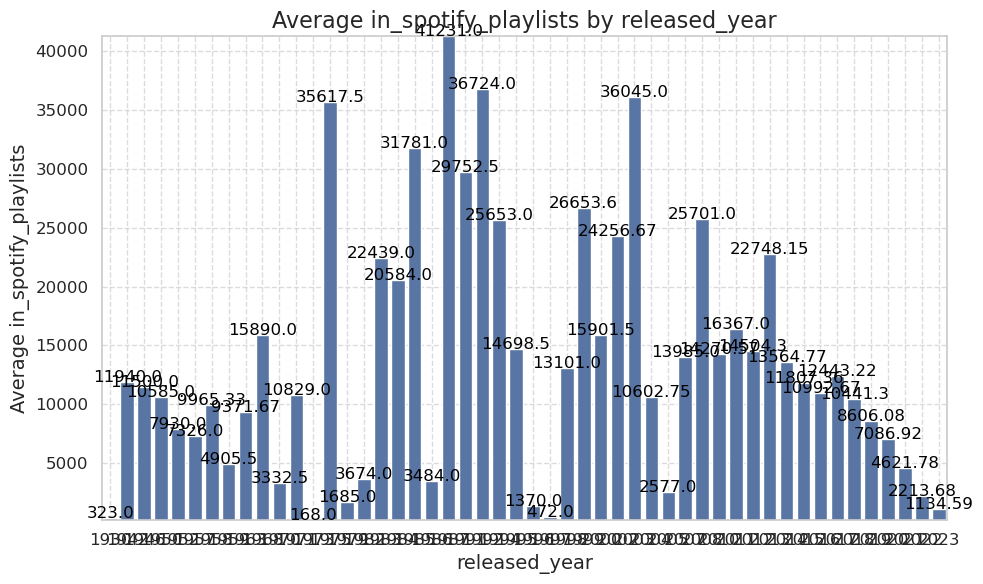

Average acousticness_% by danceability_%:
    danceability_%  acousticness_%
0               23       91.000000
1               24       77.000000
2               25       90.000000
3               27       62.000000
4               28       34.500000
5               29       68.000000
6               31       32.750000
7               32        7.000000
8               33       42.666667
9               34       49.428571
10              35       41.400000
11              36       52.000000
12              37       30.166667
13              38        9.000000
14              39       49.250000
15              40       48.600000
16              41       29.800000
17              42       71.333333
18              43       36.800000
19              44       49.416667
20              45       45.000000
21              46       46.500000
22              47       21.100000
23              48       41.666667
24              49       31.909091
25              50       19.083333
26           

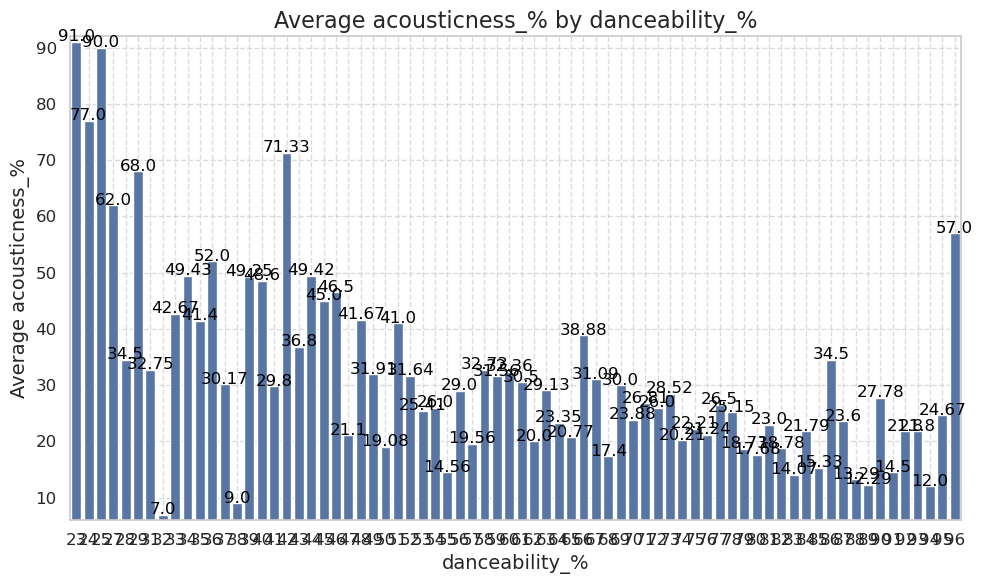

Average in_apple_playlists by released_year:
    released_year  in_apple_playlists
0            1930            4.000000
1            1942           73.000000
2            1946          140.000000
3            1950          126.000000
4            1952          108.000000
5            1957           98.500000
6            1958          133.333333
7            1959           76.500000
8            1963          139.000000
9            1968           71.000000
10           1970           18.500000
11           1971          130.000000
12           1973            0.000000
13           1975          310.500000
14           1979            1.000000
15           1982           65.500000
16           1983          211.000000
17           1984          151.750000
18           1985          109.000000
19           1986           81.000000
20           1987          228.000000
21           1991          155.000000
22           1992          146.000000
23           1994          387.000000
24   

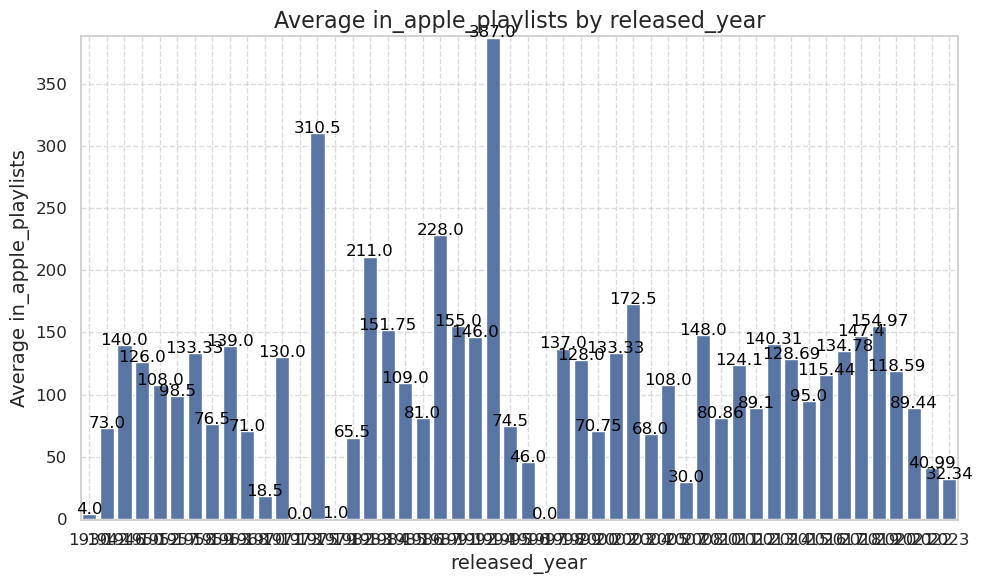

Average speechiness_% by in_apple_charts:
     in_apple_charts  speechiness_%
0                  0      11.750000
1                  1      12.575000
2                  2      12.346154
3                  3      14.916667
4                  4      12.800000
5                  5      13.466667
6                  6       8.312500
7                  7      11.461538
8                  8      11.600000
9                  9      12.846154
10                10       8.000000
11                11      15.909091
12                12      14.600000
13                13      11.777778
14                14      10.300000
15                15      12.000000
16                16       9.500000
17                17       8.100000
18                18      13.416667
19                19      10.600000
20                20      14.571429
21                21       5.357143
22                22      12.800000
23                23      21.000000
24                24       7.777778
25                25  

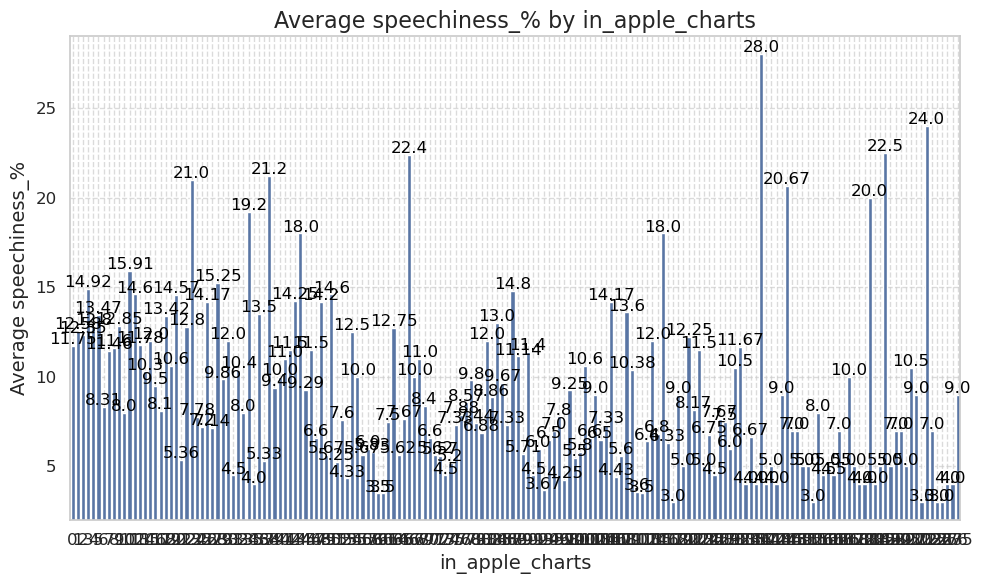

Average danceability_% by bpm:
     bpm  danceability_%
0     65       51.000000
1     67       53.000000
2     71       42.666667
3     72       55.000000
4     73       83.000000
5     74       53.000000
6     75       80.000000
7     76       59.000000
8     77       74.500000
9     78       51.222222
10    79       57.750000
11    80       58.166667
12    81       61.125000
13    82       59.714286
14    83       56.800000
15    84       58.875000
16    85       66.571429
17    86       28.000000
18    87       63.250000
19    88       63.200000
20    89       60.000000
21    90       70.095238
22    91       71.500000
23    92       72.320000
24    93       68.928571
25    94       63.200000
26    95       74.562500
27    96       68.352941
28    97       75.875000
29    98       73.125000
30    99       68.000000
31   100       68.937500
32   101       73.700000
33   102       71.700000
34   103       63.000000
35   104       73.875000
36   105       75.157895
37   106       70.8

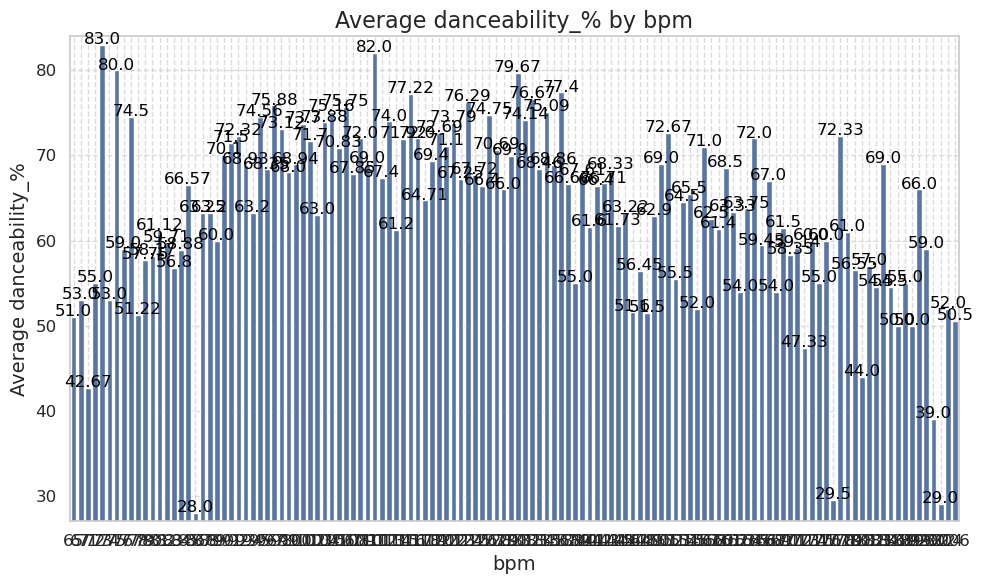

Average instrumentalness_% by valence_%:
    valence_%  instrumentalness_%
0           4            8.200000
1           5            1.000000
2           6            7.666667
3           7            0.200000
4           8           10.500000
5           9            0.500000
6          10            4.166667
7          11            7.833333
8          12            0.000000
9          13            0.000000
10         14            1.800000
11         15           25.000000
12         16            0.333333
13         17            5.000000
14         18            0.000000
15         19            6.909091
16         20            0.357143
17         21            0.000000
18         22            4.000000
19         23            9.181818
20         24            0.952381
21         25            3.600000
22         26            7.636364
23         27            0.000000
24         28            0.125000
25         29            0.000000
26         30            0.000000
27     

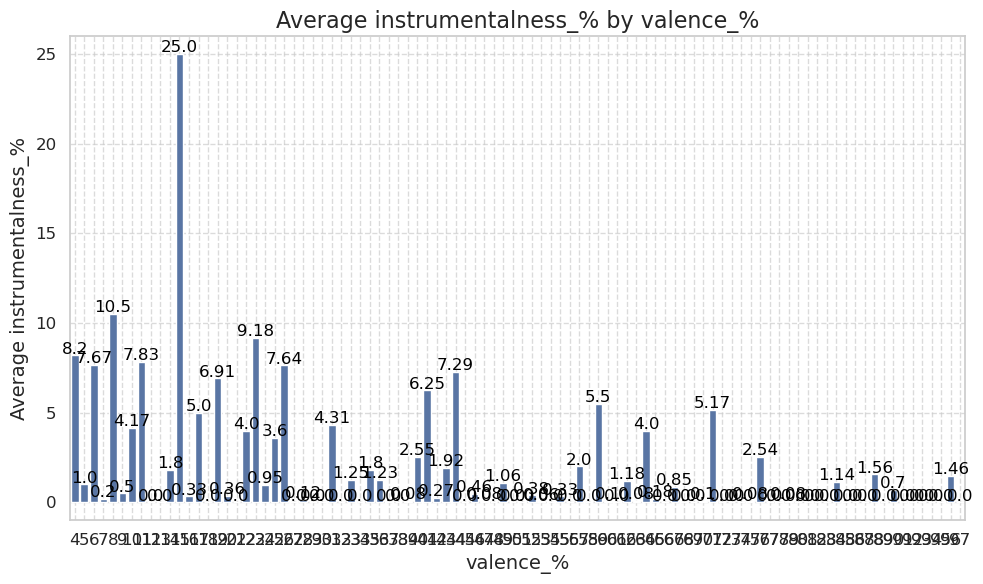

Average acousticness_% by released_year:
    released_year  acousticness_%
0            1930       22.000000
1            1942       91.000000
2            1946       84.000000
3            1950       88.000000
4            1952       64.000000
5            1957       78.500000
6            1958       75.666667
7            1959       86.000000
8            1963       52.000000
9            1968        7.000000
10           1970       27.000000
11           1971       32.000000
12           1973       39.000000
13           1975       35.000000
14           1979       36.000000
15           1982       18.500000
16           1983       54.000000
17           1984       11.000000
18           1985       54.000000
19           1986       18.000000
20           1987        9.000000
21           1991       37.000000
22           1992        1.000000
23           1994       16.000000
24           1995        6.000000
25           1996        5.000000
26           1997       42.000000
27     

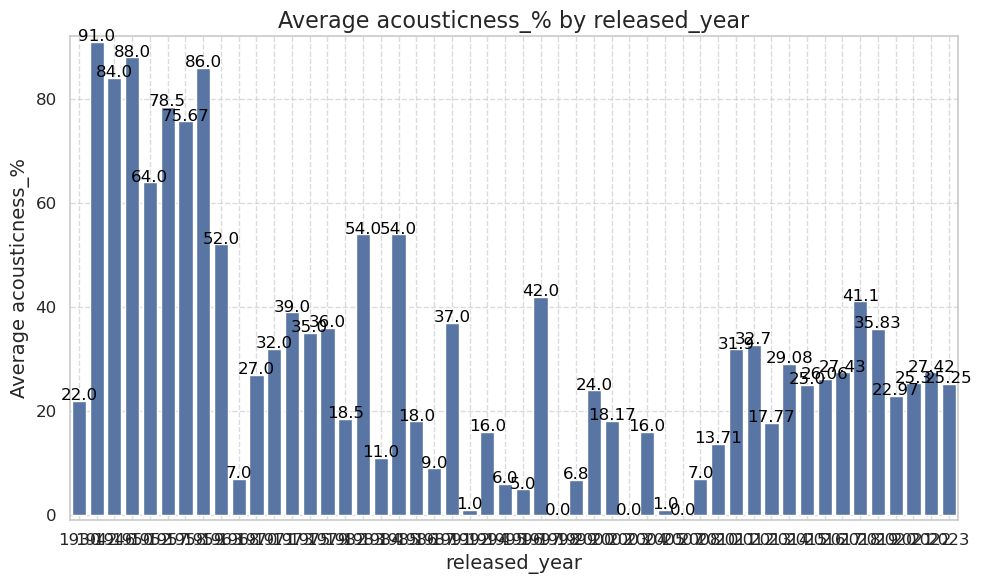

Average valence_% by released_month:
    released_month  valence_%
0                1  57.208955
1                2  57.901639
2                3  54.081395
3                4  46.530303
4                5  51.140625
5                6  51.325581
6                7  52.709677
7                8  49.130435
8                9  48.642857
9               10  41.369863
10              11  49.000000
11              12  52.560000
ANOVA test result for valence_% by released_month: F-statistic = 3.032028803963652, p-value = 0.0005398869923387829


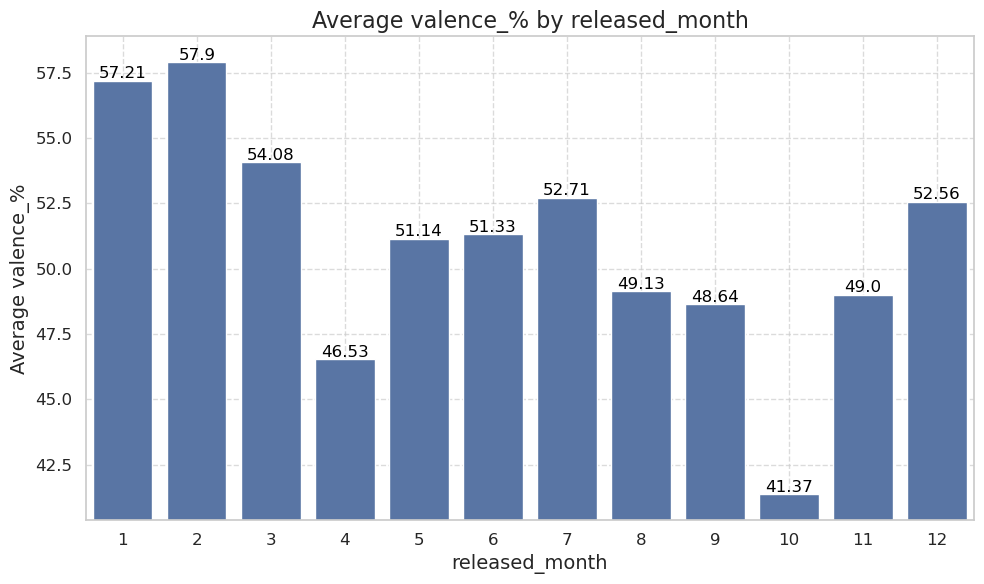

Average speechiness_% by in_apple_playlists:
     in_apple_playlists  speechiness_%
0                     0      10.086957
1                     1      10.937500
2                     2       6.571429
3                     3      10.117647
4                     4      12.500000
5                     5       7.736842
6                     6      15.250000
7                     7      13.750000
8                     8      14.136364
9                     9      21.083333
10                   10       7.850000
11                   11       8.705882
12                   12      13.250000
13                   13       9.153846
14                   14      16.933333
15                   15      10.916667
16                   16       6.900000
17                   17      12.500000
18                   18       8.555556
19                   19      10.250000
20                   20      12.650000
21                   21      11.384615
22                   22      11.000000
23                 

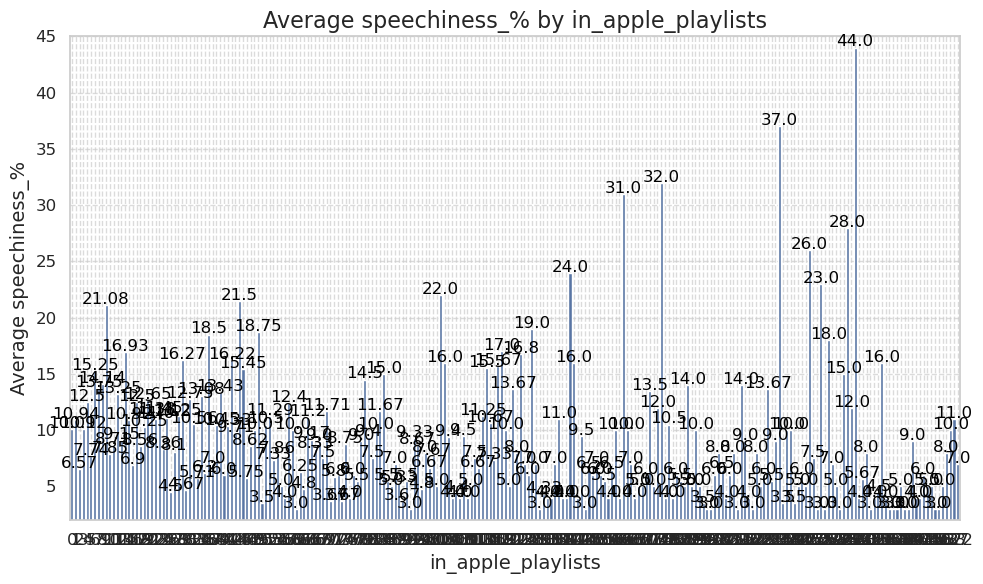

In [27]:
# Set Seaborn style
sns.set(style="whitegrid")

for category_col, value_col in to_analyze:
    category_col, value_col = value_col, category_col

    # Group by category_col and calculate the mean of value_col
    average_scores = data.groupby(category_col)[value_col].mean().reset_index()
    print(f"Average {value_col} by {category_col}:")
    print(average_scores)

    # Perform ANOVA test
    category_groups = [data[data[category_col] == category][value_col] for category in data[category_col].unique()]
    anova_result = f_oneway(*category_groups)
    print(f"ANOVA test result for {value_col} by {category_col}: F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}")

    # Create a bar plot for average value_col by category_col
    plt.figure(figsize=(10, 6))
    bar_plot = sns.barplot(data=average_scores, x=category_col, y=value_col)

    # Add data labels
    for index, row in average_scores.iterrows():
        bar_plot.text(row.name, row[value_col] + 0.1, round(row[value_col], 2), color='black', ha="center")

    # Adjust y-axis limits to zoom in on the range of interest
    plt.ylim(average_scores[value_col].min() - 1, average_scores[value_col].max() + 1)

    plt.title(f'Average {value_col} by {category_col}', fontsize=16)
    plt.xlabel(category_col, fontsize=14)
    plt.ylabel(f'Average {value_col}', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)

    # Adjust layout to remove spaces
    plt.tight_layout()

    plt.show()

In [43]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

artists = data["artist(s)_name"].transform(lambda x: x.split(", "))
artists = artists[artists.apply(lambda x: len(x) > 1)]


# Convert the filtered artists into a list of lists
transactions = filtered_artists.tolist()

# One-hot encode the transactions
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Apply the Apriori algorithm
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Print the results
print(frequent_itemsets)
print(rules)

ModuleNotFoundError: No module named 'mlxtend'